In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from collections import defaultdict, Counter
from pprint import pprint
sys.path.append(os.path.join(os.path.abspath(''), 'triple_agent'))
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions

In [3]:
from triple_agent.reports.mission_choices import print_mission_choices
from triple_agent.reports.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.action_tests import action_test_percentages, difficult_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.character_selection import spy_selection, st_selection, amba_selection, double_agent_selection
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.reports.report_utilities import SCL5_PICK_MODES, SCL5_VENUE_MODES
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.reports.scl_set_scores import scl_set_scores_categorize, game_differential
from triple_agent.reports.game_durations import game_durations

In [4]:
DIVISIONS = ["Diamond", "Platinum", "Gold", "Silver", "Bronze", "Copper", "Iron","Obsidian", "Oak", "Challenger"]

In [58]:
dropped_players = {
    'baldrick',
    "brskaylor",
    "rta",
    "Hectic",
    "bitbandingpig",
    "frostie",
    "belial",
    "tristram",
    "the_usual_toaster" ,
    "ThatOdinaryPlayer",
    "PixelBandit",
    "gasol",
    "kevino",
    "tge",
    "Tortuga-Man",
    "Vlady",
    "sergioc89",
    "mintyrug",
    "ml726"
}

In [59]:
def select_scl5(game):           
    return (
        game.event == 'SCL5' and 
        game.division != 'Challenger' and
        game.spy not in dropped_players and 
        game.sniper not in dropped_players
    )

In [60]:
scl5_replays = get_parsed_replays(select_scl5)

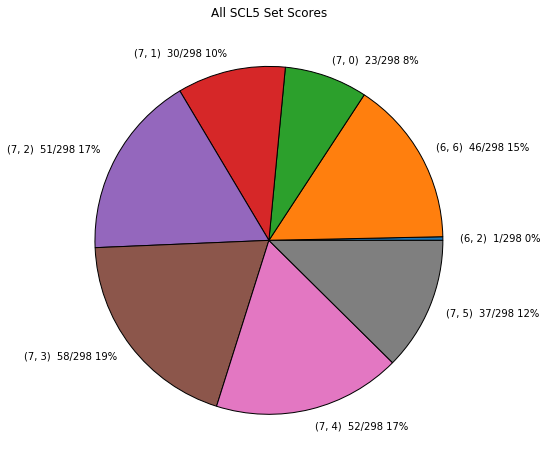

In [61]:
scl_set_scores_categorize(scl5_replays, 'All SCL5 Set Scores')

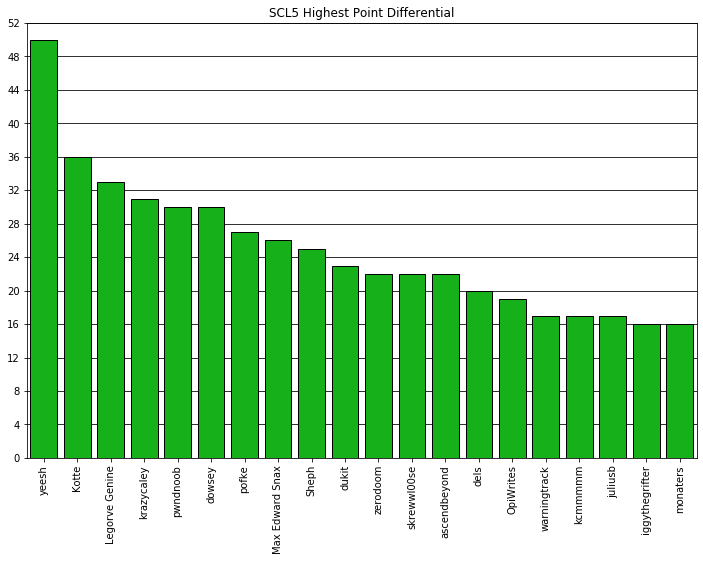

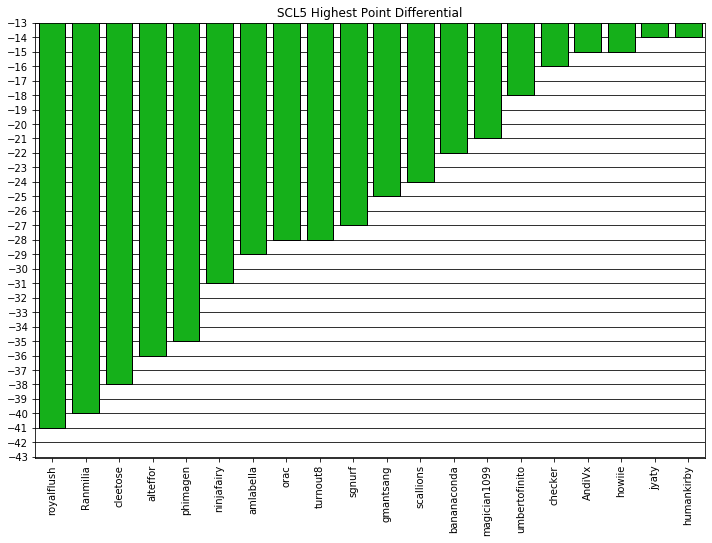

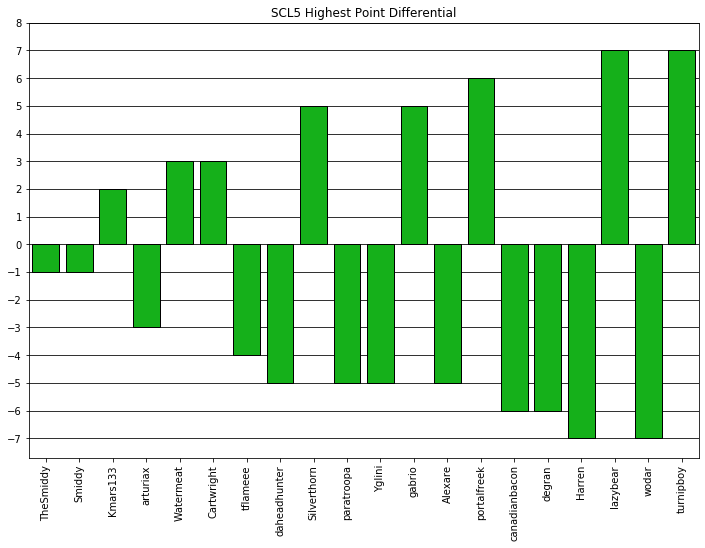

In [62]:
game_differential(
    scl5_replays,
    'SCL5 Highest Point Differential',
)

In [63]:
game_setups = dict()
for game in scl5_replays:
    if game.venue not in game_setups.keys():
        game_setups[game.venue] = dict()
        
    if game.game_type not in game_setups[game.venue].keys():
        game_setups[game.venue][game.game_type] = Counter()

    game_setups[game.venue][game.game_type][game.start_clock_seconds] += 1
pprint(game_setups)    

{'Aquarium': {'a4/8': Counter({240: 151})},
 'Balcony': {'a2/3': Counter({120: 205, 135: 1})},
 'Ballroom': {'a4/8': Counter({210: 386, 240: 2, 180: 2, 150: 1})},
 'Courtyard': {'a4/7': Counter({195: 320, 180: 64, 225: 2})},
 'Gallery': {'a4/8': Counter({225: 212, 210: 78})},
 'High-Rise': {'a3/5': Counter({225: 176, 210: 48})},
 'Library': {'a5/8': Counter({270: 317, 240: 83})},
 'Moderne': {'a5/8': Counter({270: 324, 240: 1, 300: 1})},
 'Pub': {'a3/5': Counter({210: 196})},
 'Teien': {'a4/8': Counter({210: 150})},
 'Terrace': {'a3/5': Counter({210: 127, 180: 17})},
 'Veranda': {'a5/8': Counter({255: 136, 240: 16})}}


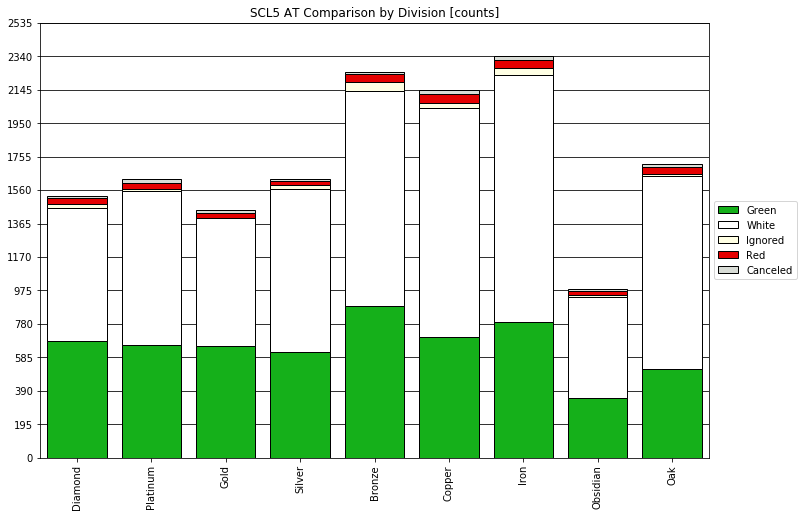

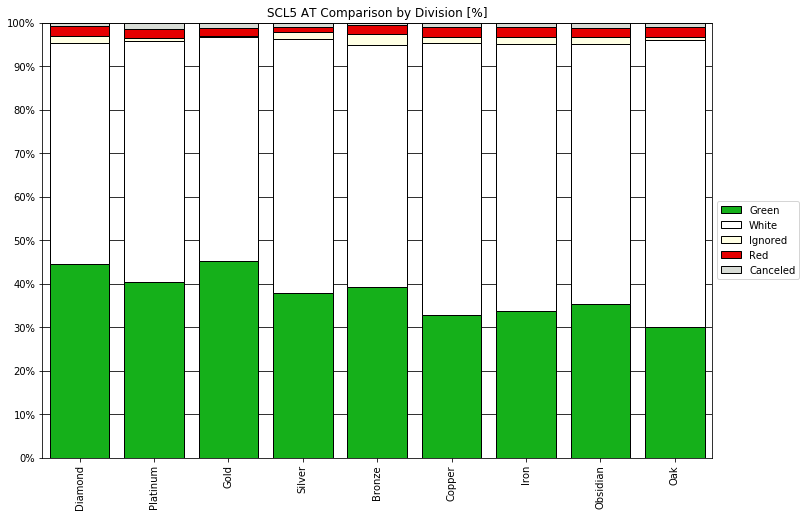

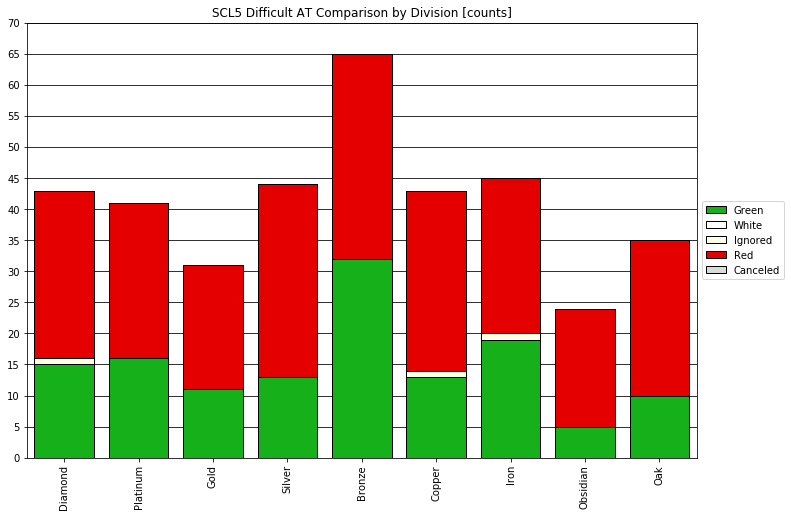

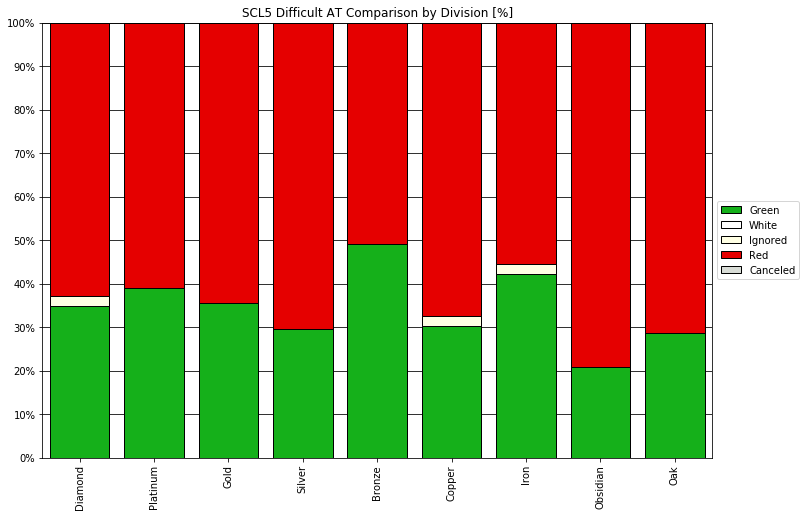

In [64]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Division',
    groupby=lambda g: g.division,
    order=lambda s: DIVISIONS.index(s),
)
difficult_action_test_percentages(
    scl5_replays,
    'SCL5 Difficult AT Comparison by Division',
    groupby=lambda g: g.division,
    order=lambda s: DIVISIONS.index(s),
)

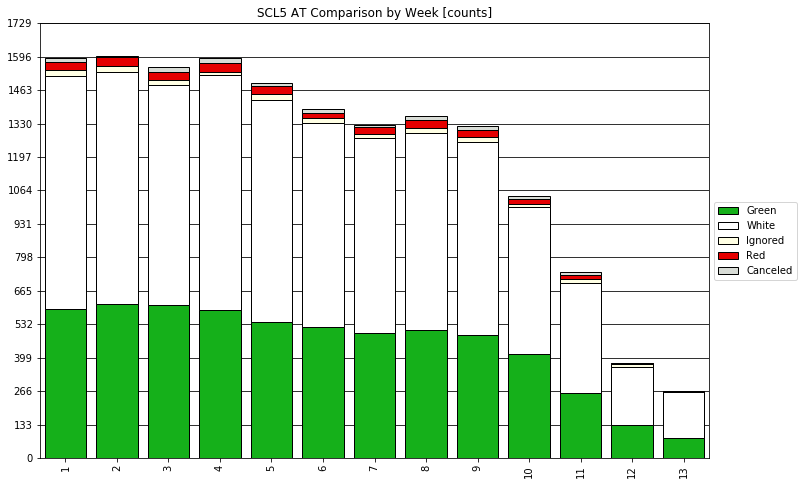

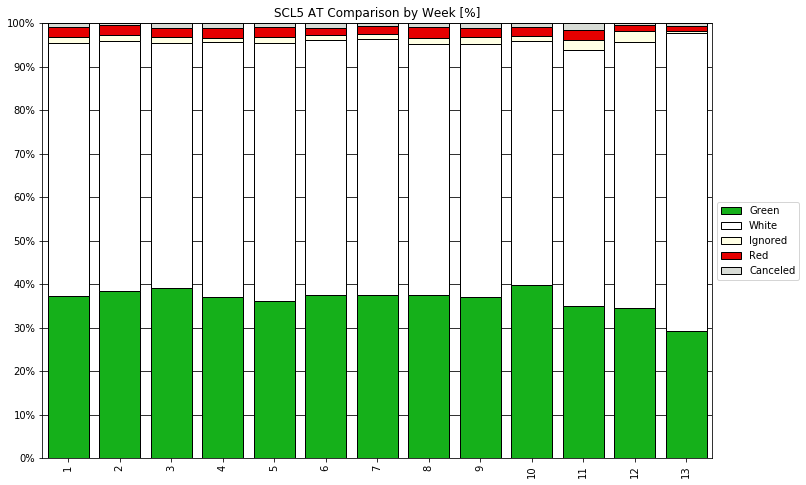

In [65]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Week',
    groupby=lambda g: g.week,
)

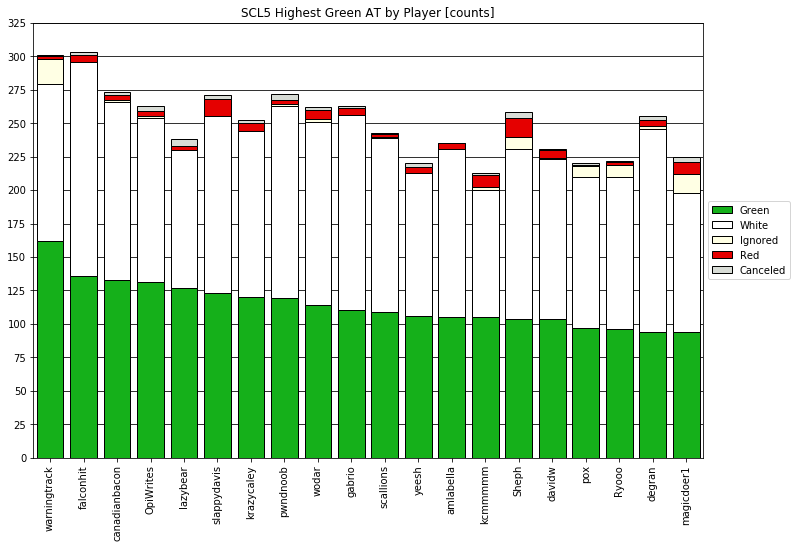

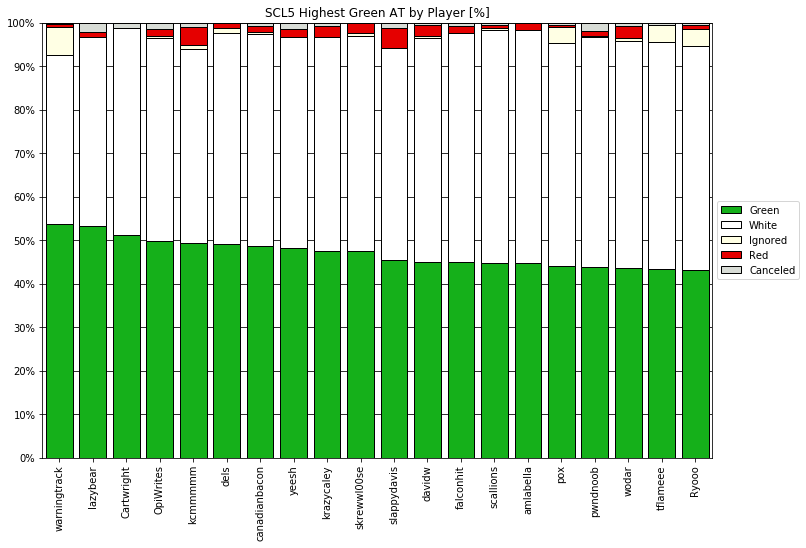

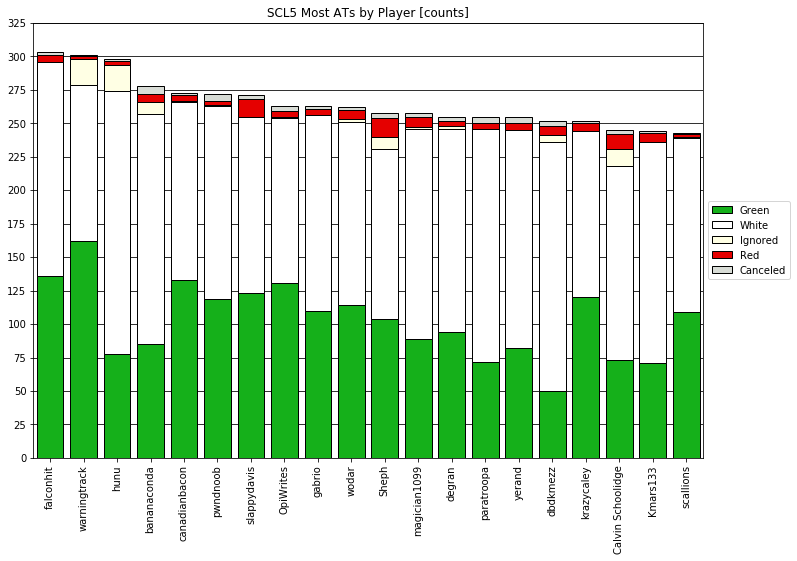

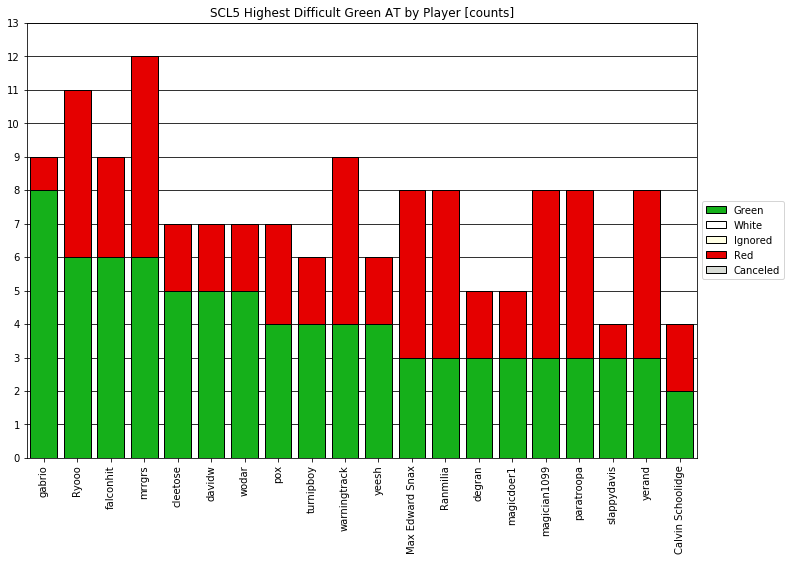

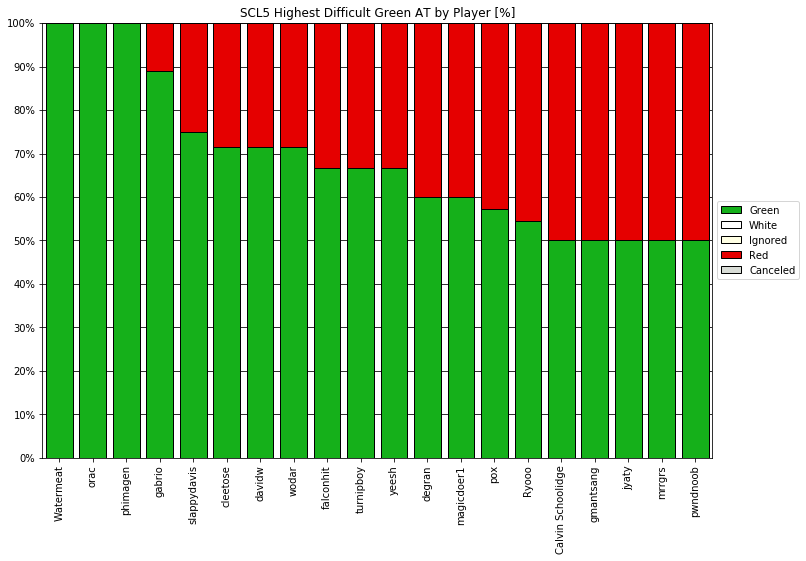

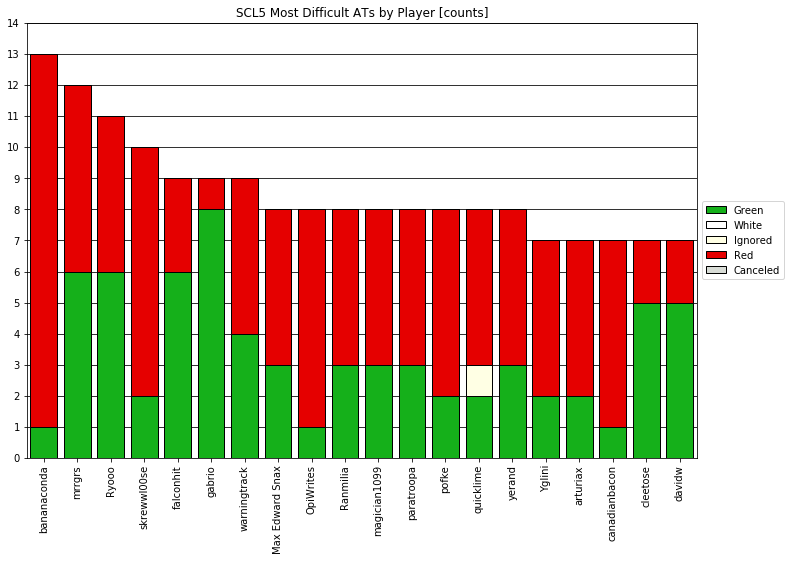

In [66]:
action_test_percentages(
    scl5_replays,
    'SCL5 Highest Green AT by Player',
    groupby=lambda g: g.spy,
    sort_data_item=ActionTest.Green,
    limit=20
)
action_test_percentages(
    scl5_replays,
    'SCL5 Most ATs by Player',
    groupby=lambda g: g.spy,
    sort_data_item=sum,
    limit=20,
    percentile_plot=False
)
difficult_action_test_percentages(
    scl5_replays,
    'SCL5 Highest Difficult Green AT by Player',
    groupby=lambda g: g.spy,
    sort_data_item=ActionTest.Green,
    limit=20
)
difficult_action_test_percentages(
    scl5_replays,
    'SCL5 Most Difficult ATs by Player',
    groupby=lambda g: g.spy,
    sort_data_item=sum,
    limit=20,
    percentile_plot=False
)

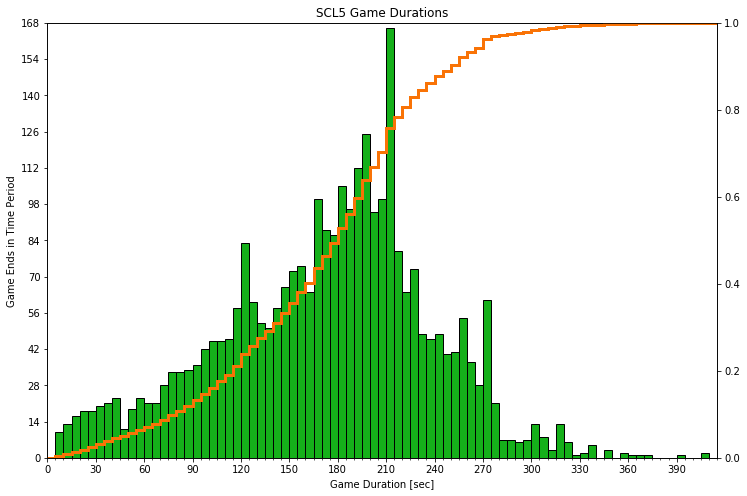

In [67]:
game_durations(scl5_replays, "SCL5 Game Durations")

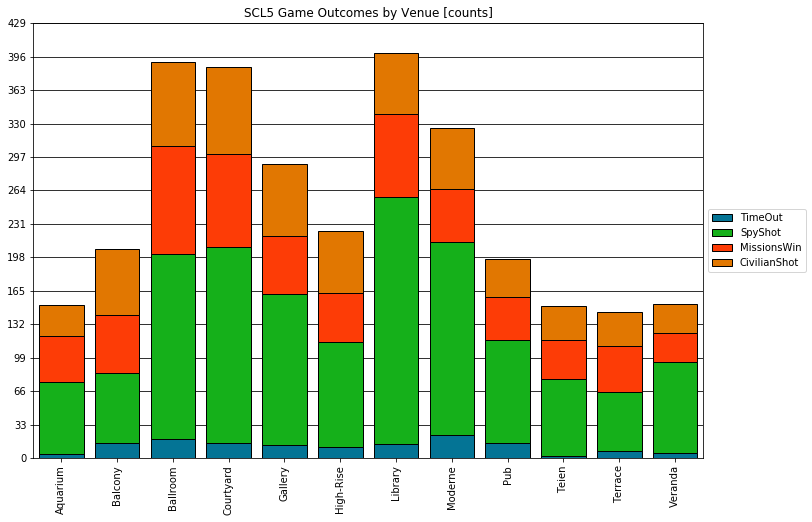

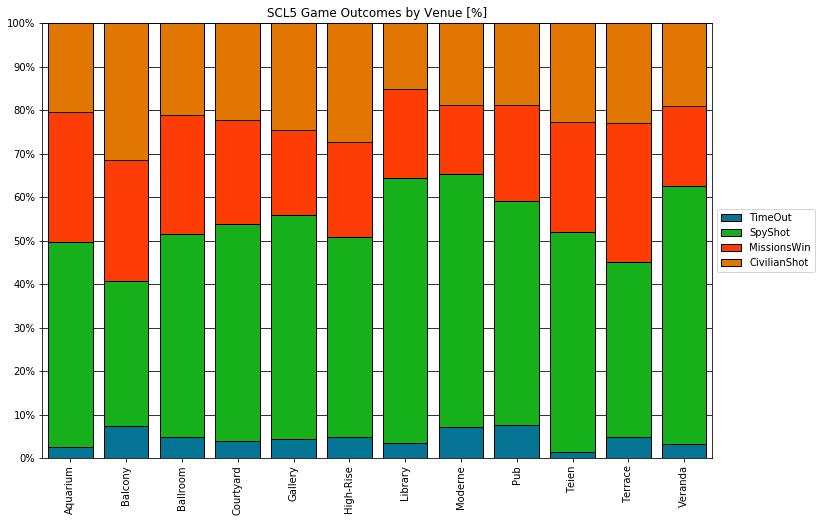

In [68]:
game_outcomes(scl5_replays, "SCL5 Game Outcomes by Venue", groupby=lambda g: g.venue)

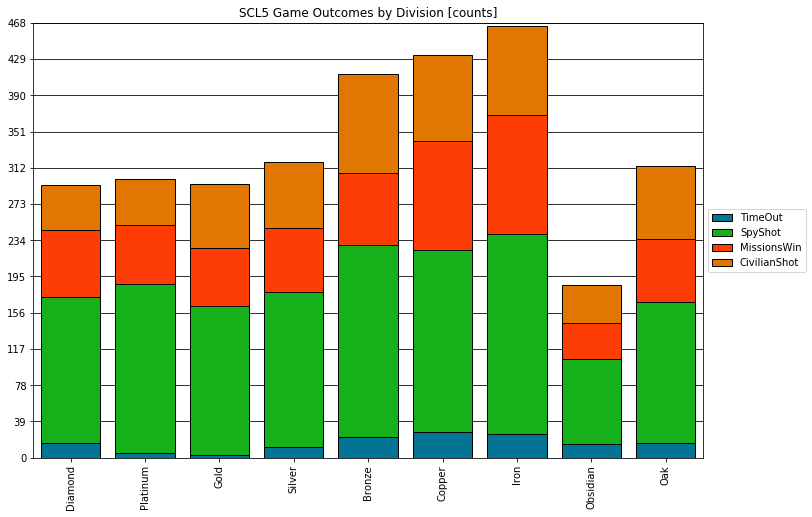

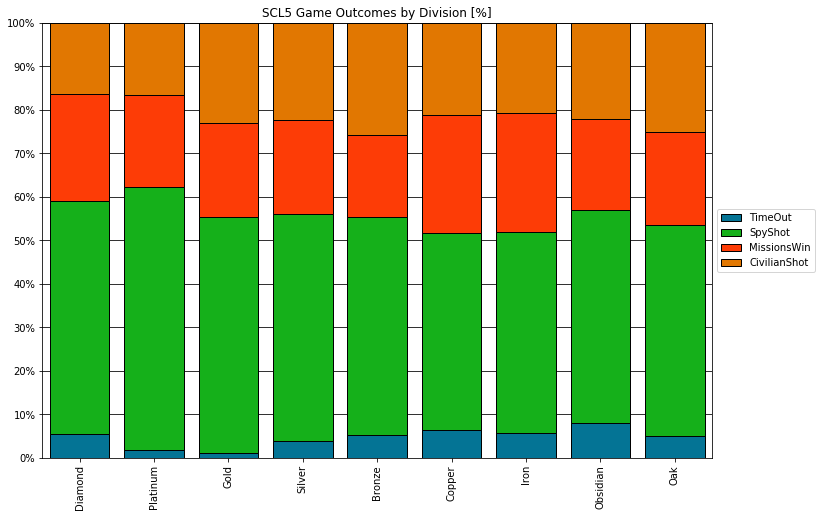

In [69]:
game_outcomes(scl5_replays, "SCL5 Game Outcomes by Division", groupby=lambda g: g.division, order=lambda g: DIVISIONS.index(g))

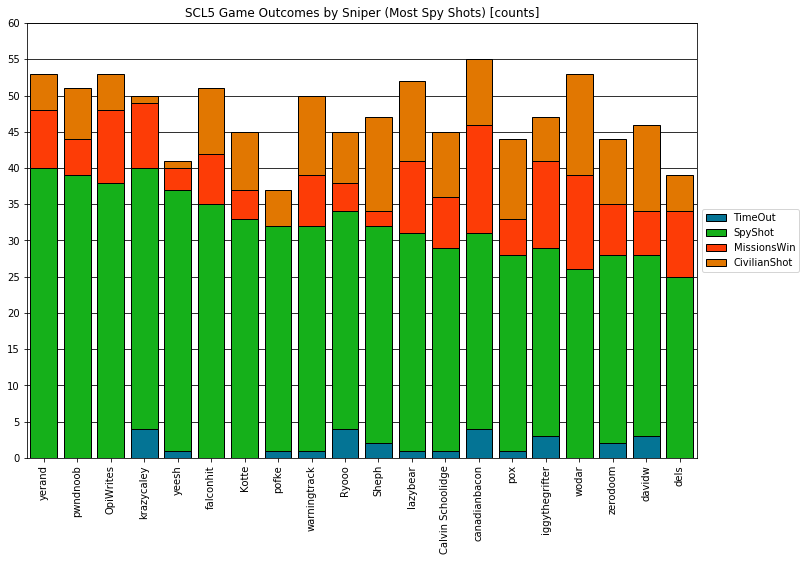

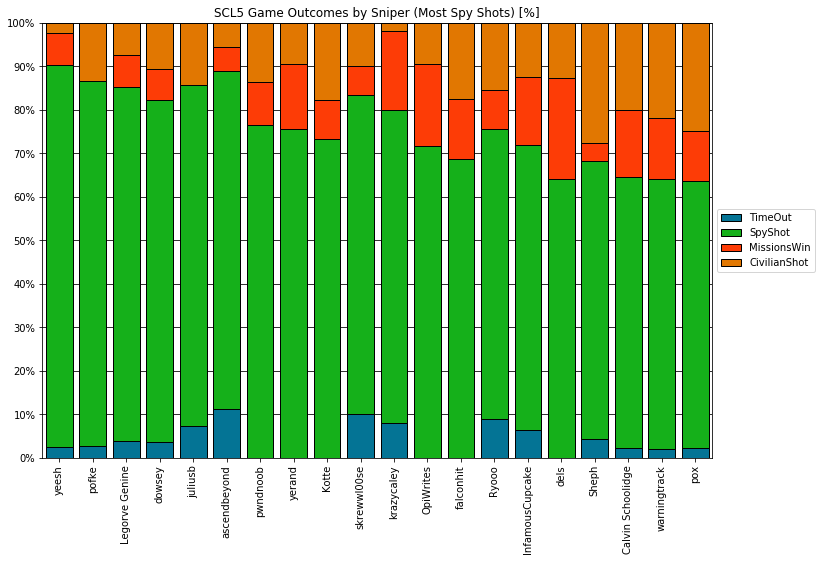

In [70]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Spy Shots)",
    groupby=lambda g: g.sniper,
    sort_data_item=WinType.SpyShot,
    limit=20
)

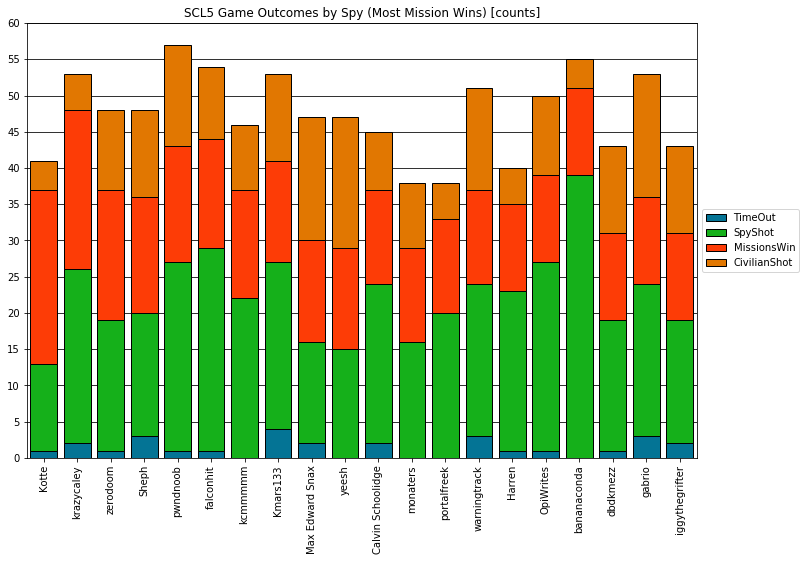

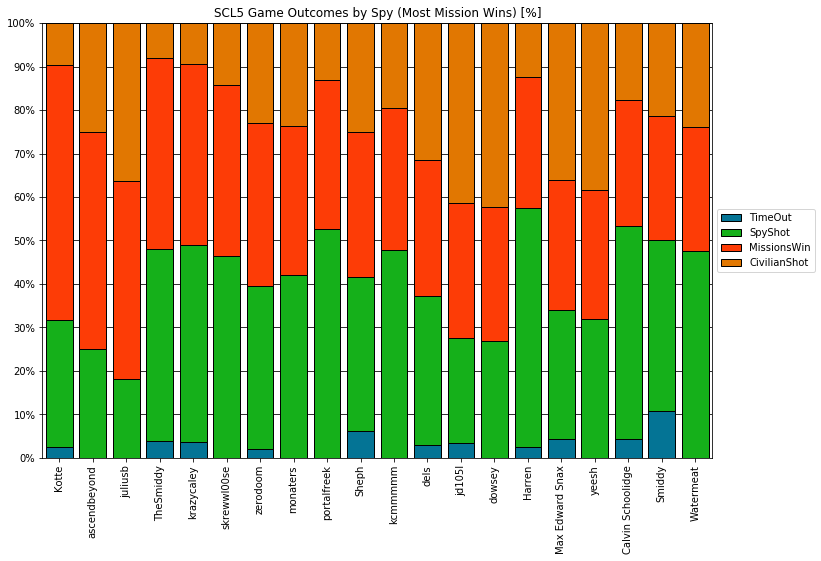

In [71]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Mission Wins)",
    groupby=lambda g: g.spy,
    sort_data_item=WinType.MissionsWin,
    limit=20
)

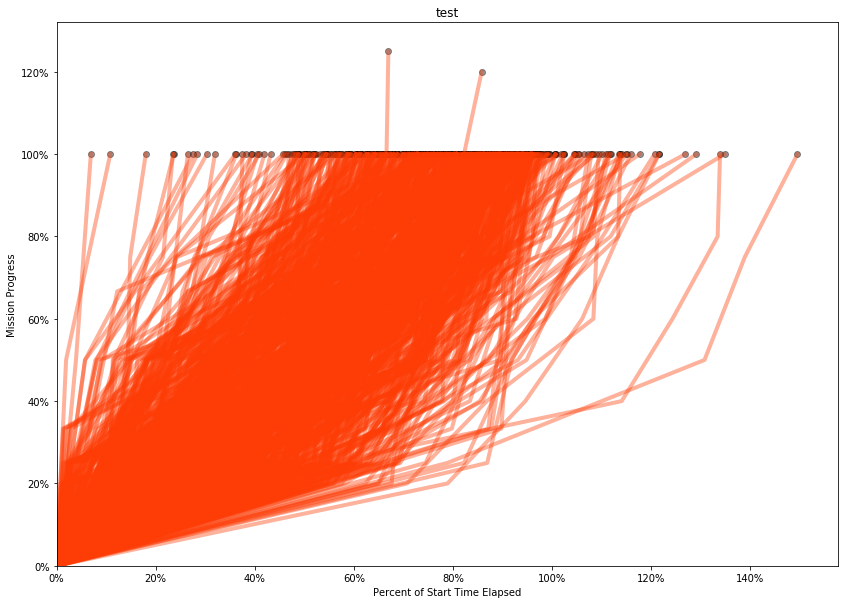

In [72]:
mission_progress(filter(lambda g: g.win_type == WinType.MissionsWin, scl5_replays), 'test')

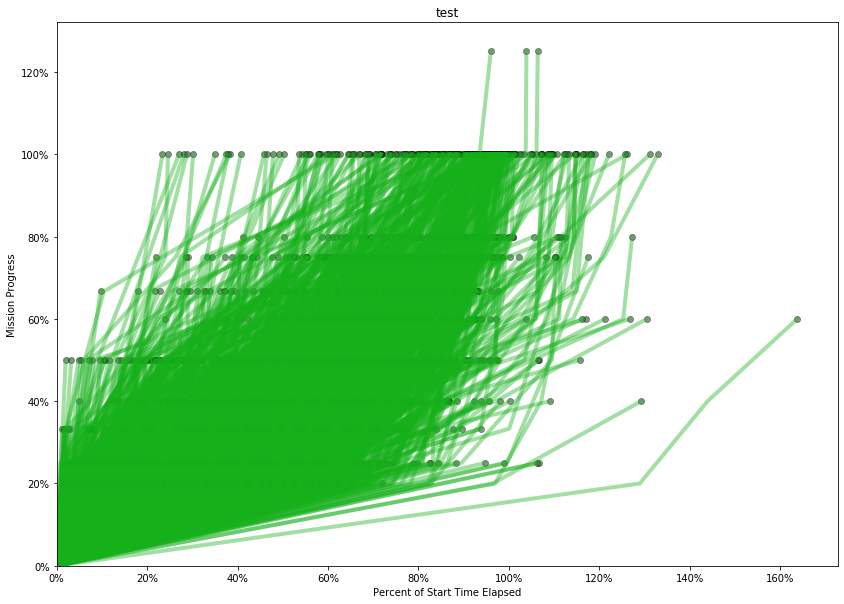

In [73]:
mission_progress(filter(lambda g: g.win_type == WinType.SpyShot, scl5_replays), 'test')

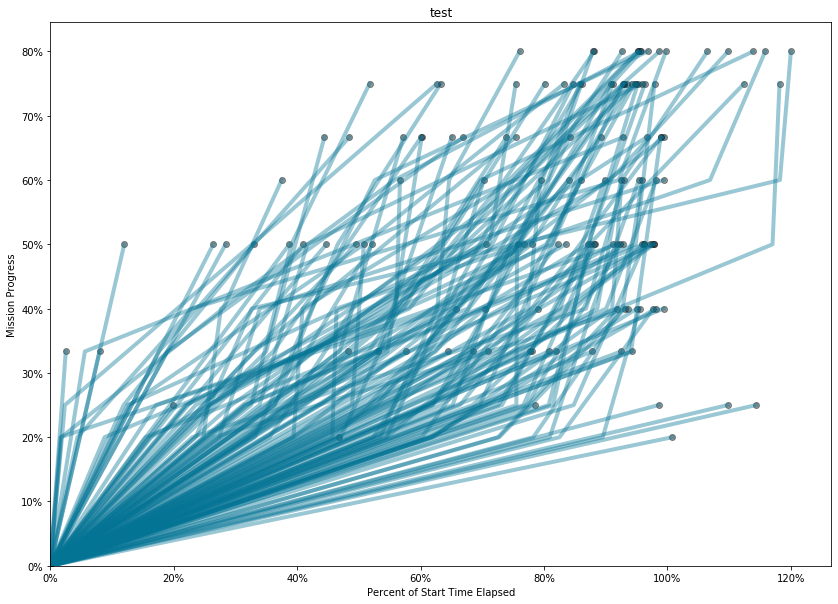

In [74]:
mission_progress(filter(lambda g: g.win_type == WinType.TimeOut, scl5_replays), 'test')

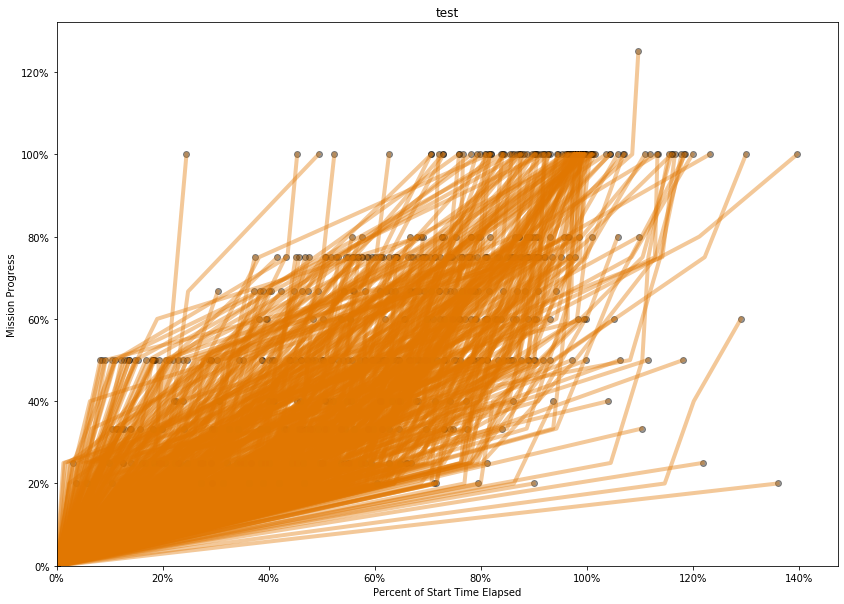

In [75]:
mission_progress(filter(lambda g: g.win_type == WinType.CivilianShot, scl5_replays), 'test')

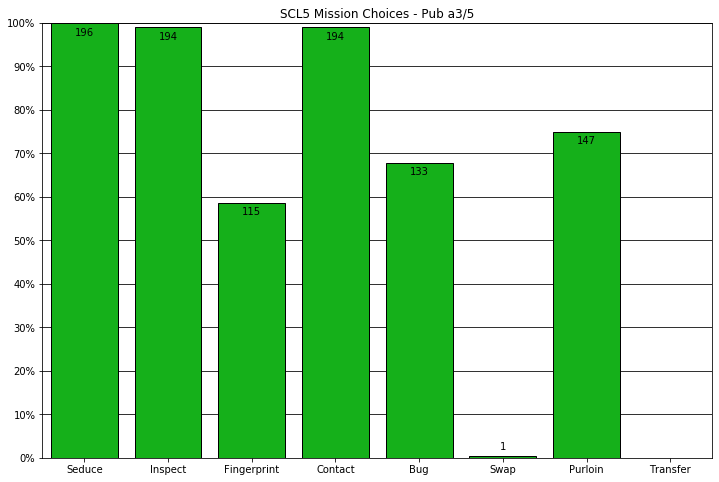

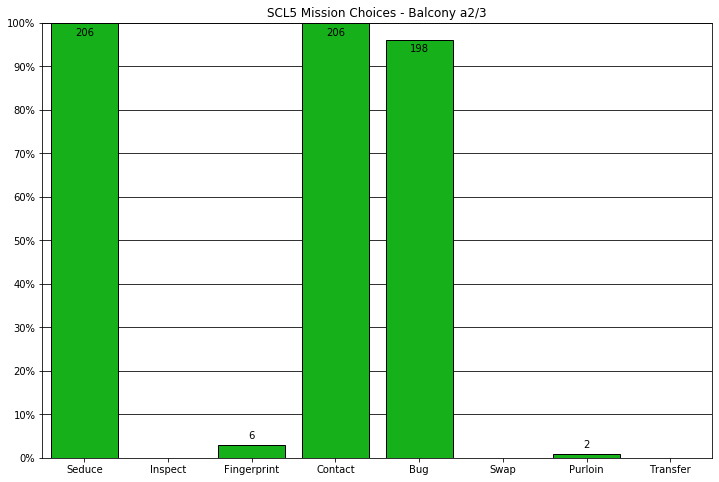

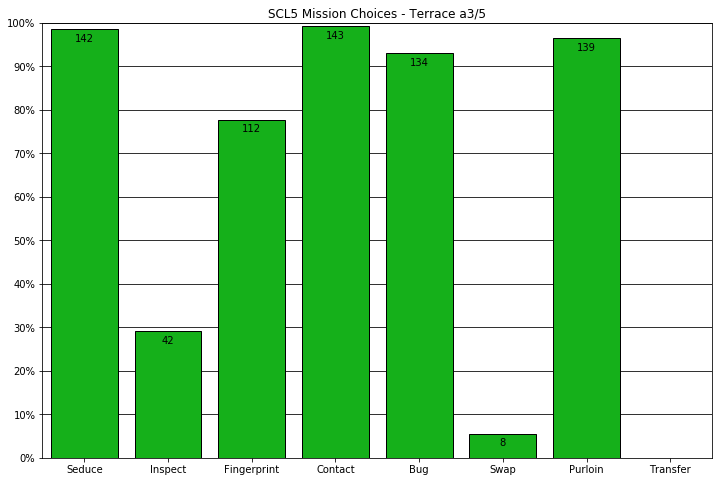

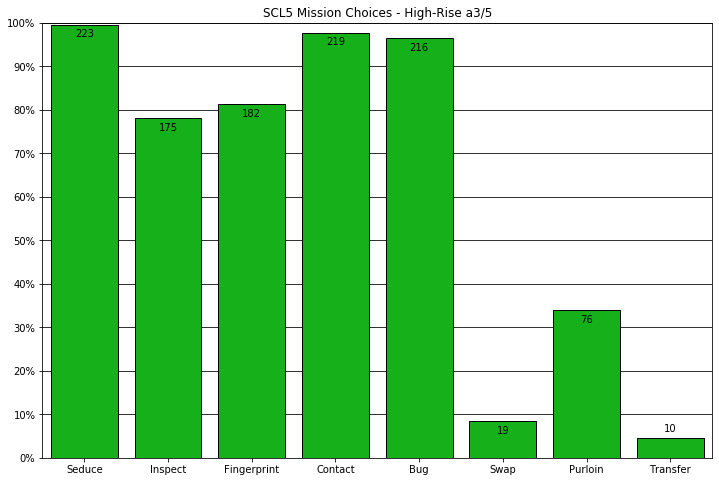

In [76]:
print_mission_choices(scl5_replays, "SCL5 Mission Choices", SCL5_PICK_MODES)

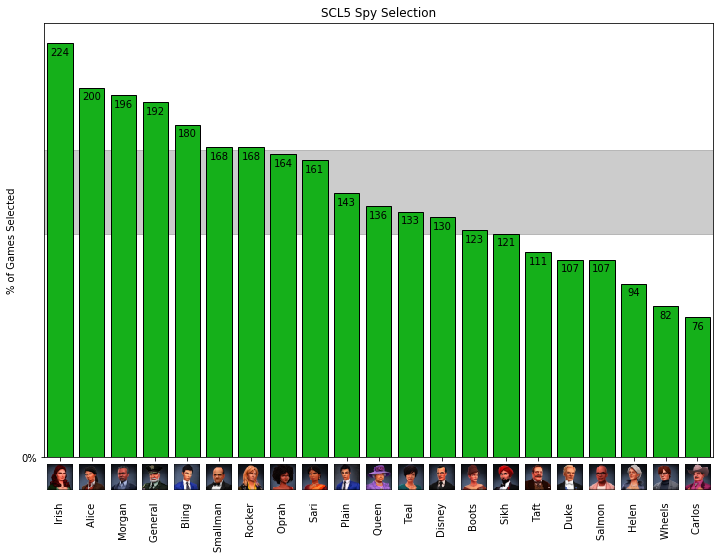

In [77]:
spy_selection(scl5_replays, "SCL5 Spy Selection")

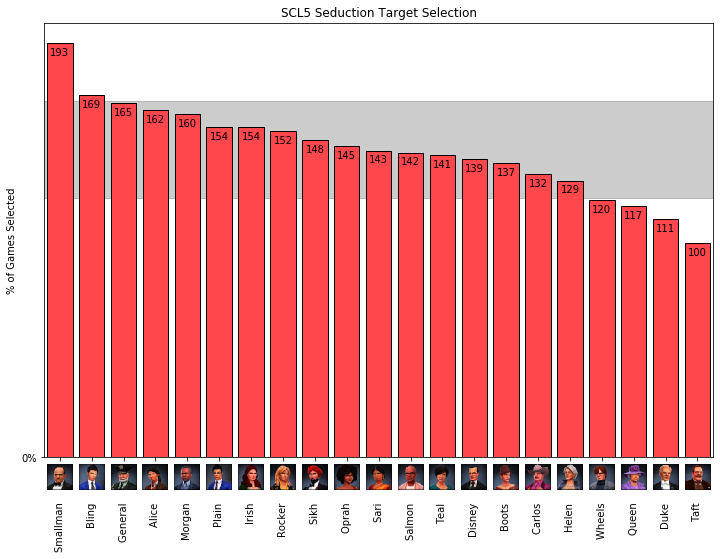

In [78]:
st_selection(scl5_replays, "SCL5 Seduction Target Selection")

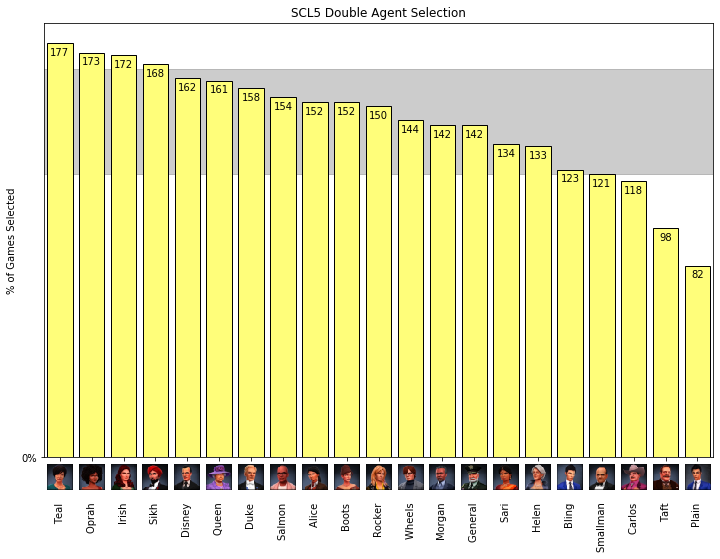

In [79]:
double_agent_selection(scl5_replays, "SCL5 Double Agent Selection")

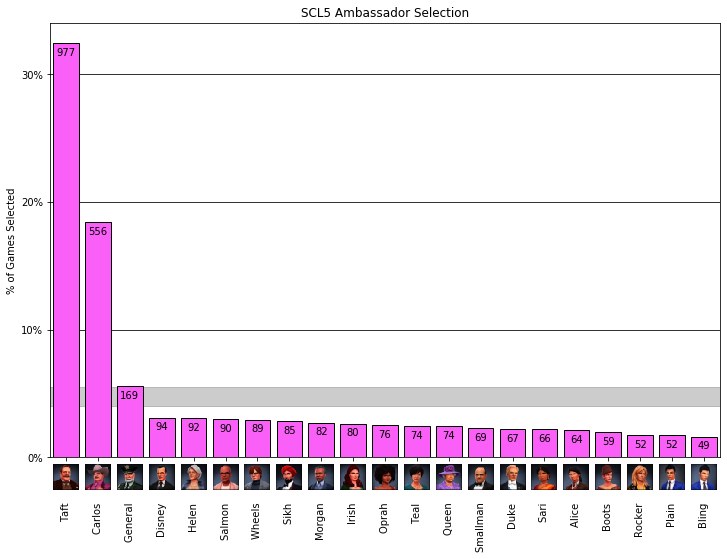

In [80]:
amba_selection(scl5_replays, "SCL5 Ambassador Selection")

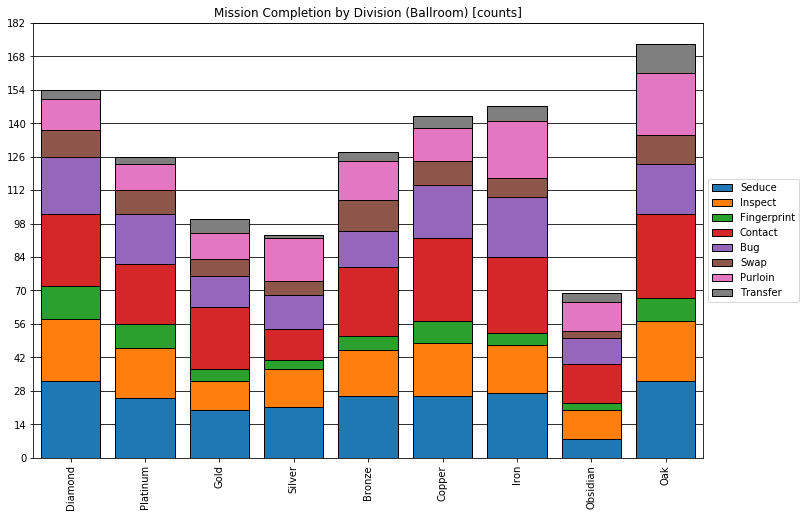

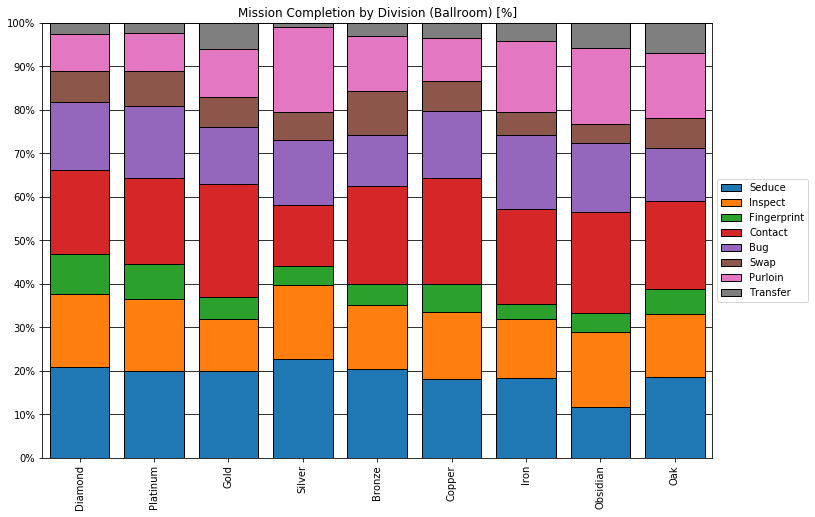

In [81]:
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue=='Ballroom', scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    "Mission Completion by Division (Ballroom)",
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)

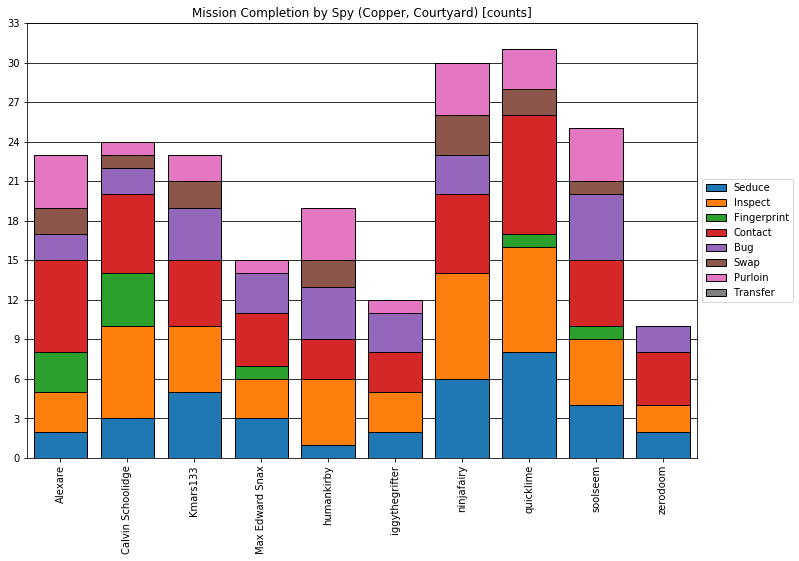

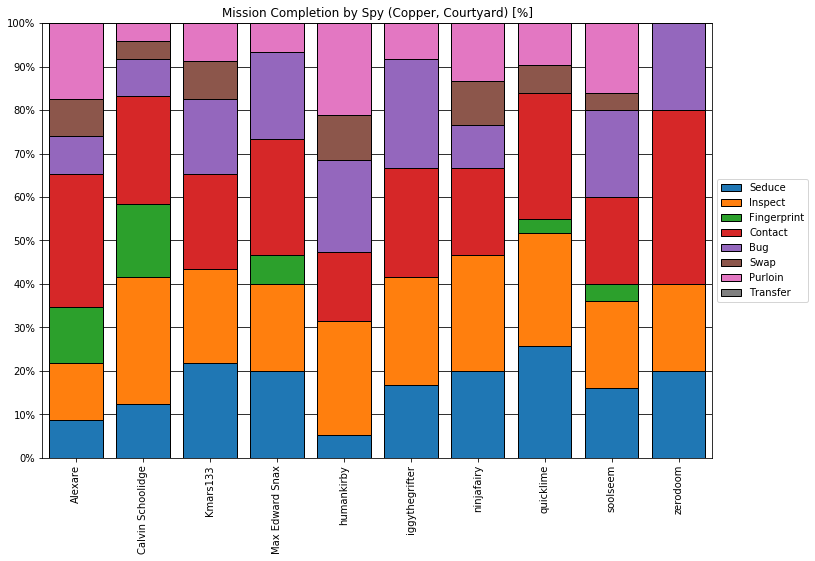

In [82]:
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.division == "Copper" and g.venue=='Courtyard', scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    "Mission Completion by Spy (Copper, Courtyard)",
    groupby=lambda g: g.spy,
)

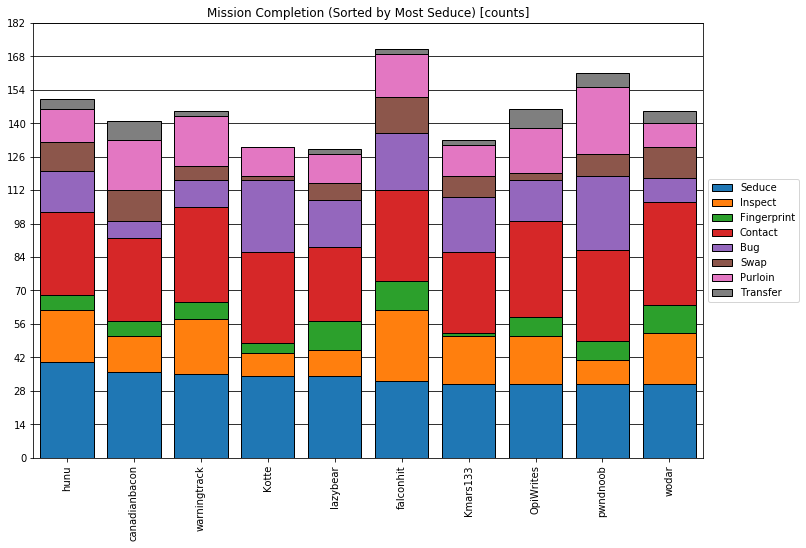

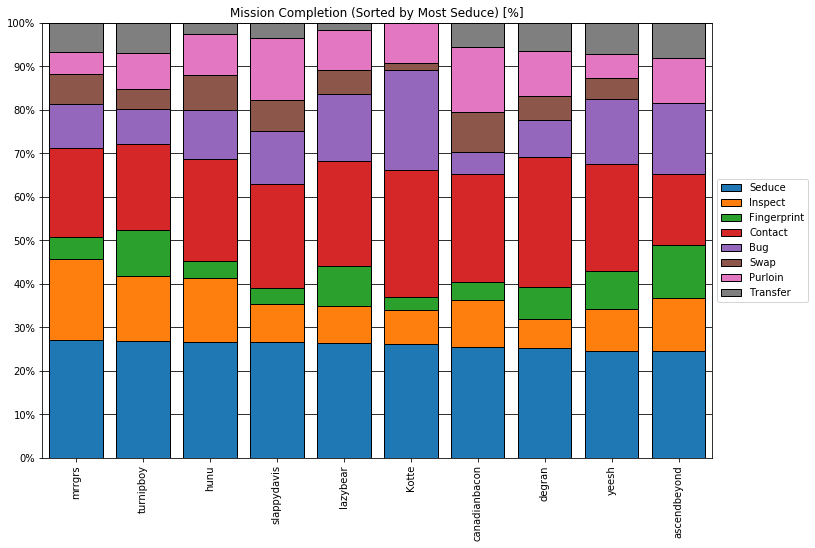

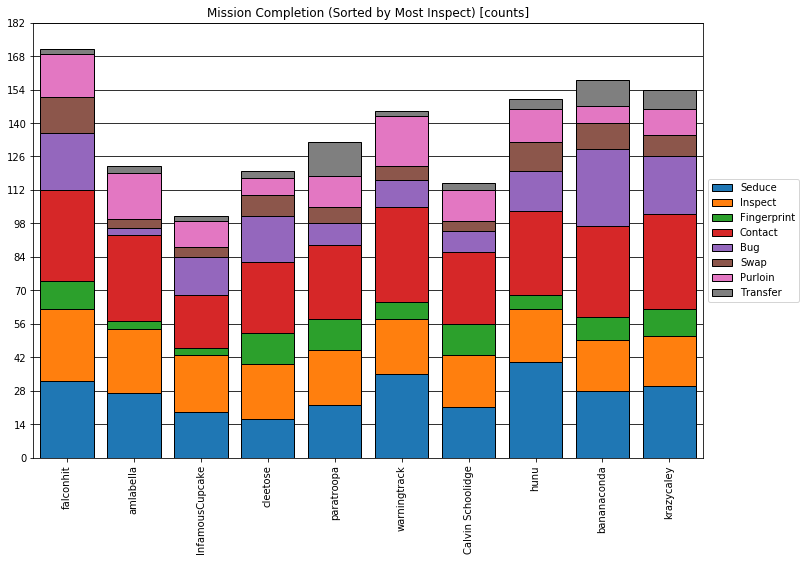

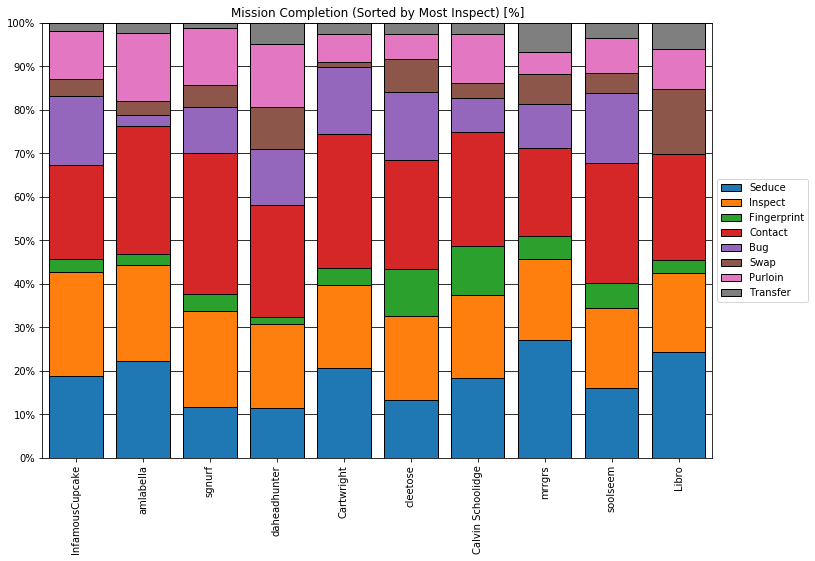

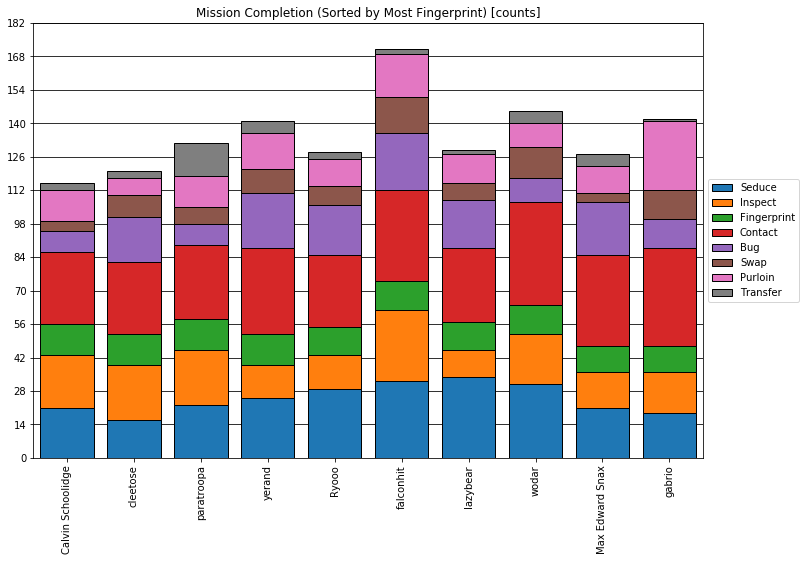

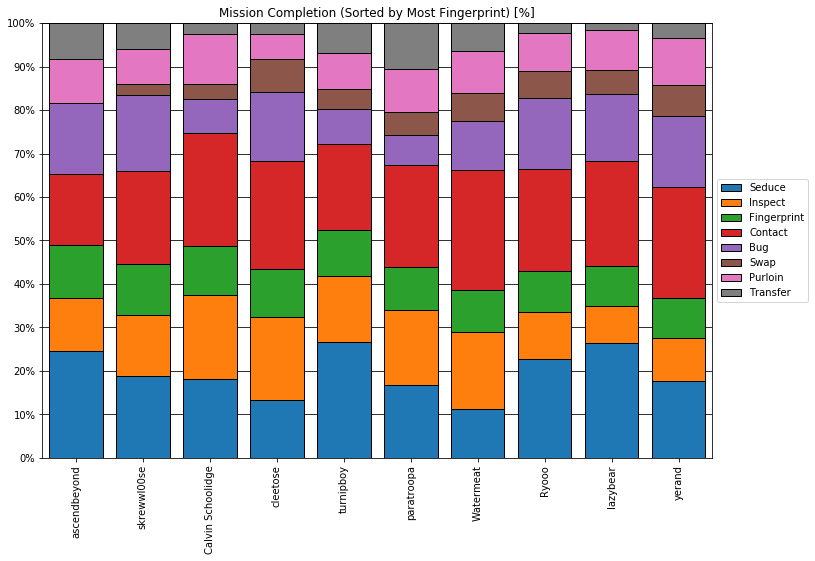

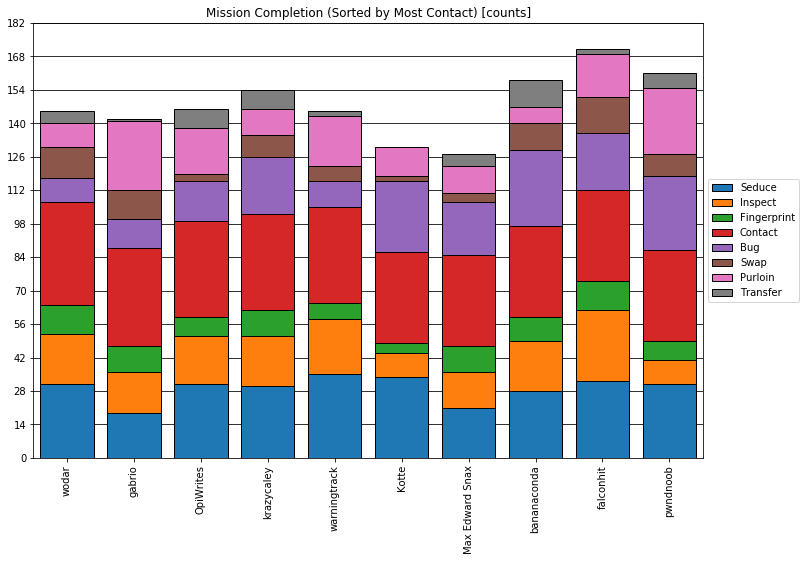

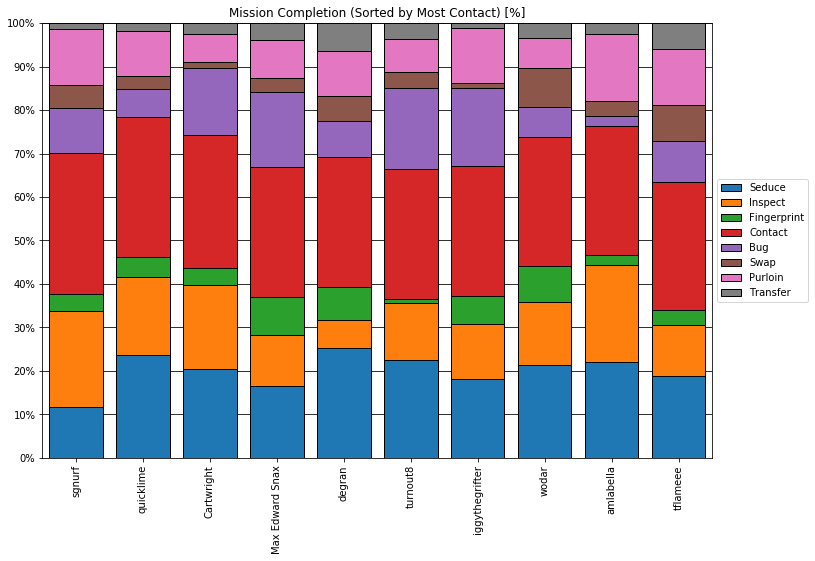

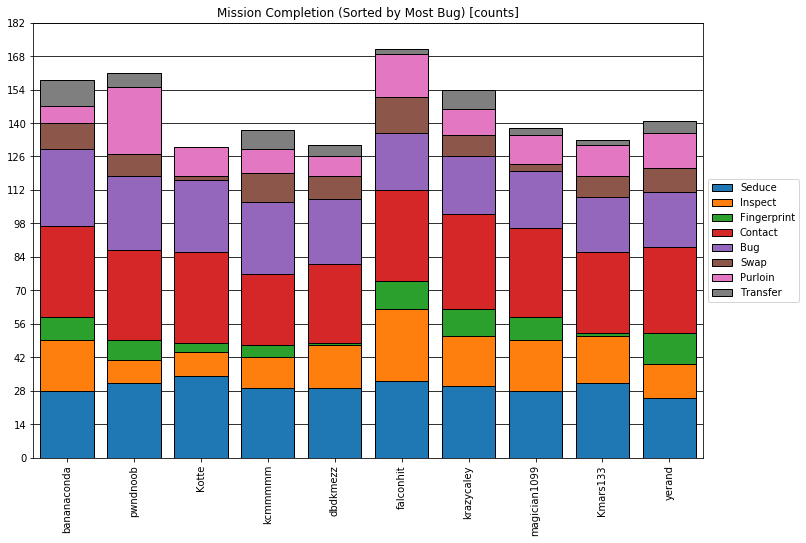

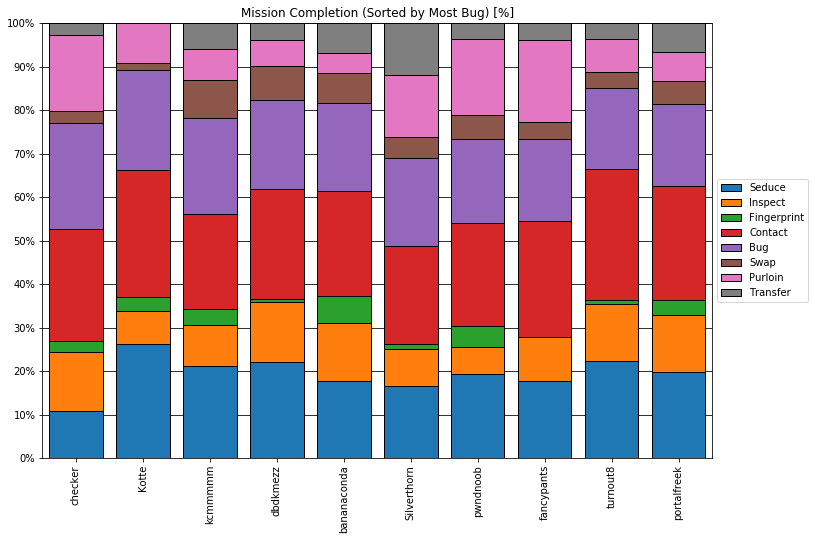

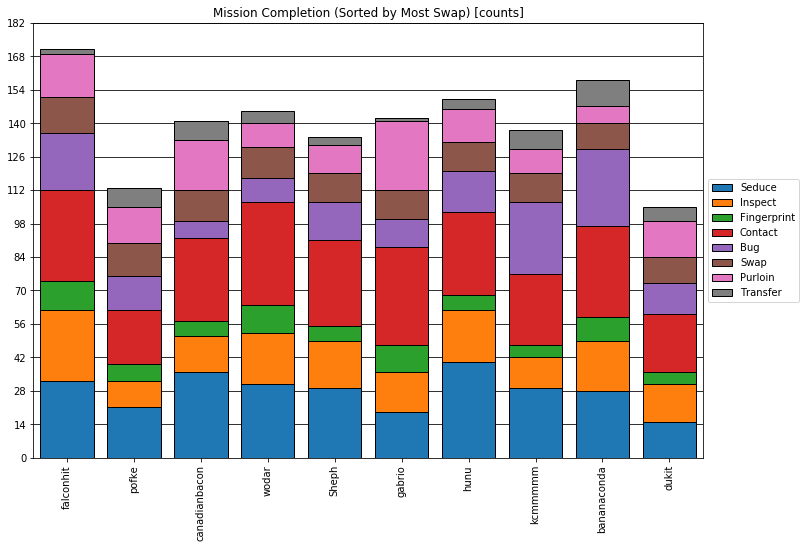

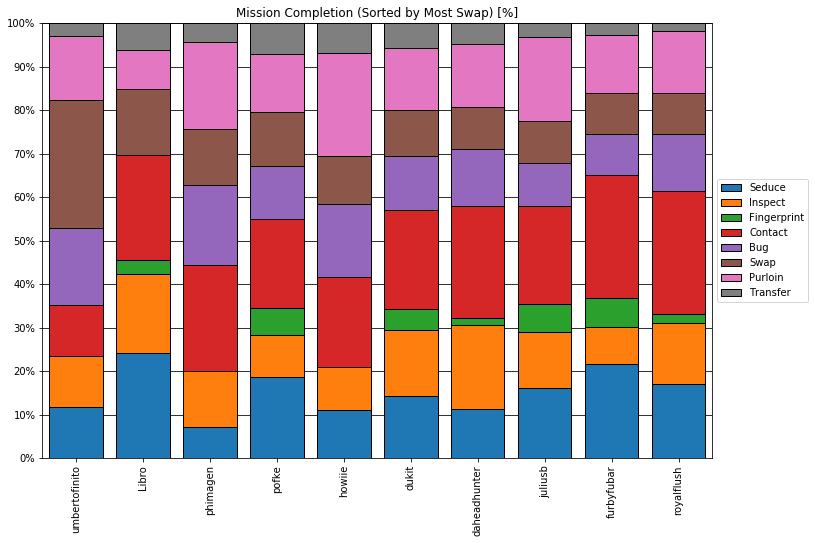

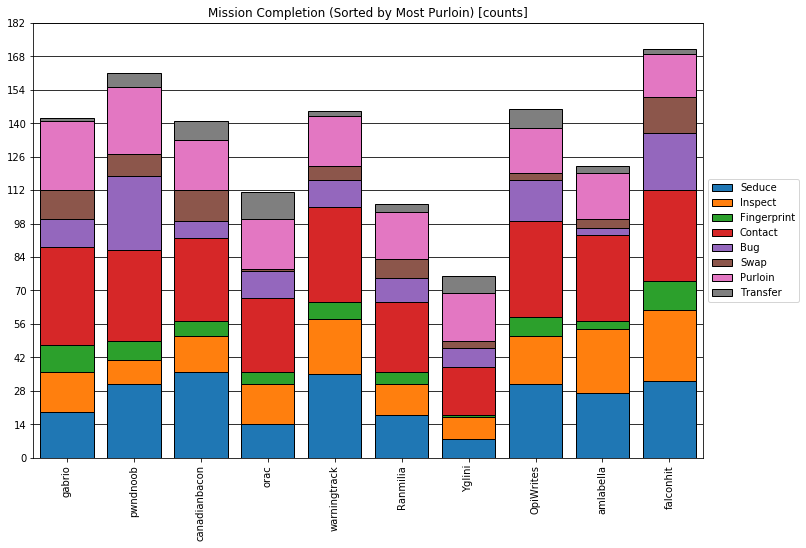

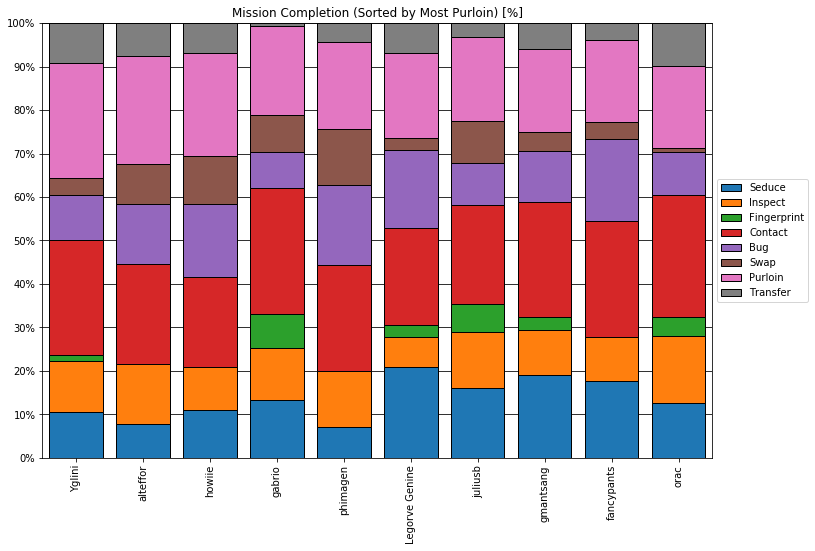

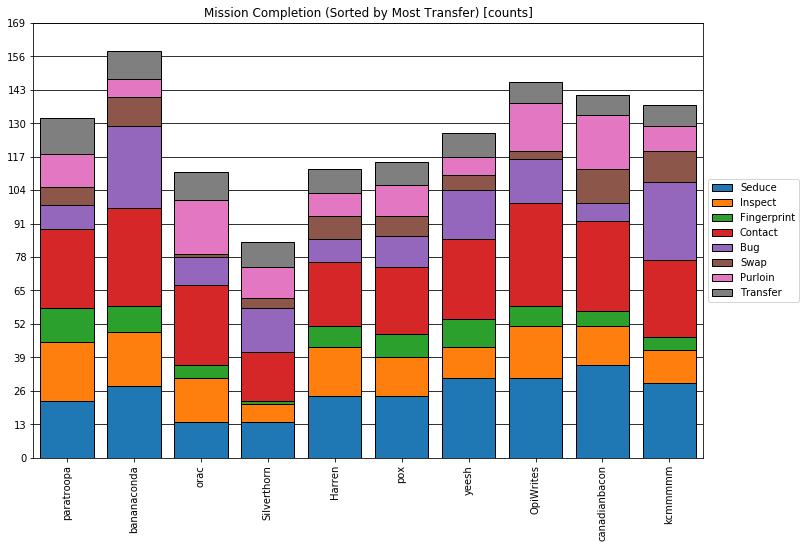

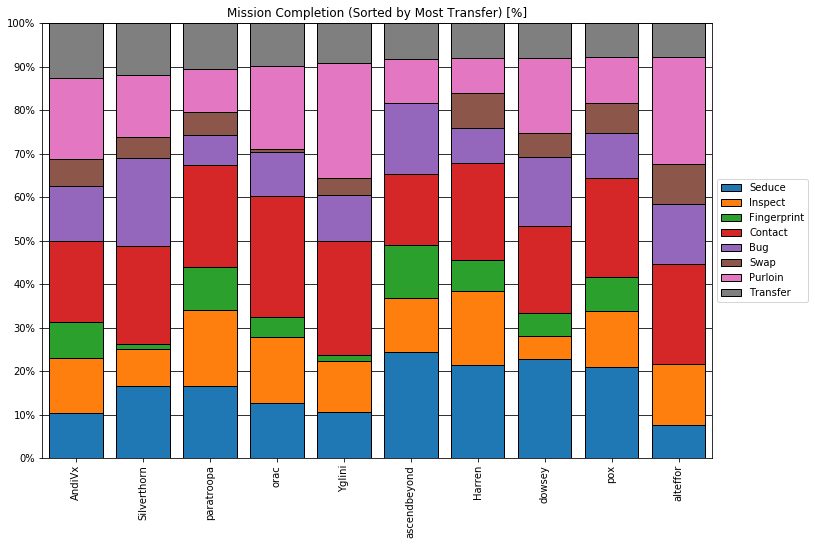

In [83]:
for m in Missions:
    if m != Missions.Zero:
        mission_completion_query(
            scl5_replays,
            f"Mission Completion (Sorted by Most {m.name})",
            groupby=lambda g: g.spy,
            sort_data_item = m,
            limit=10,
        )

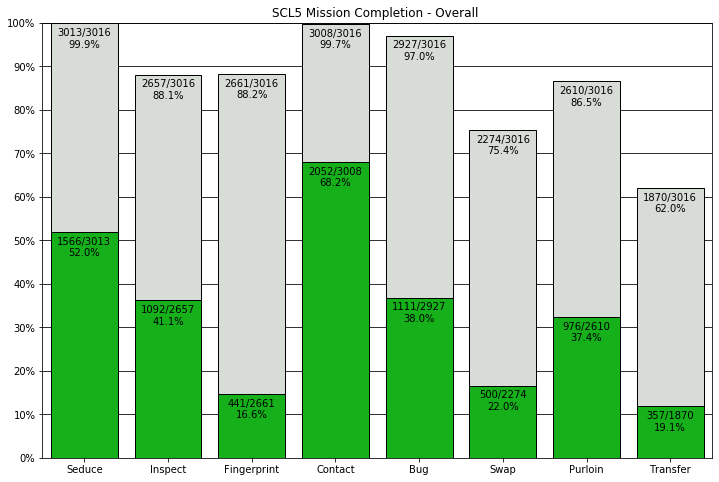

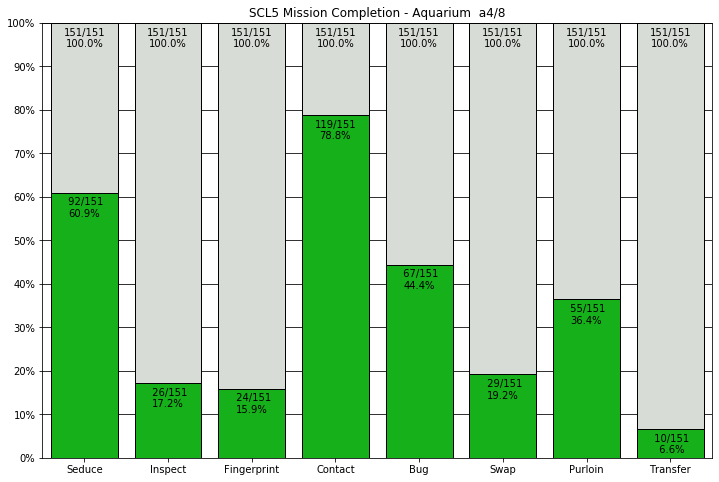

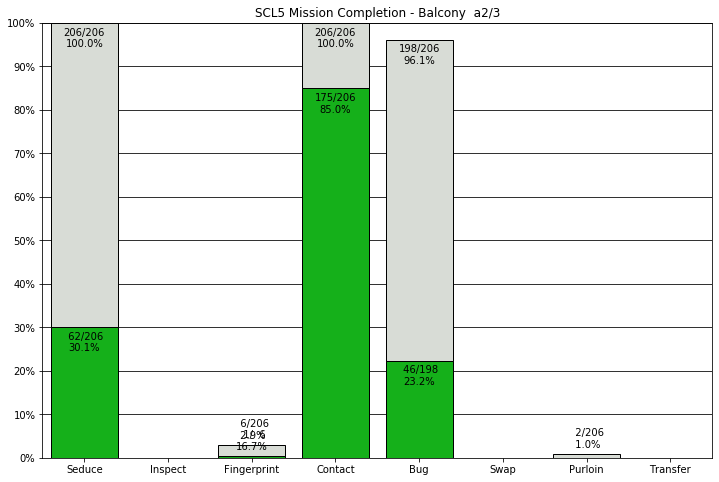

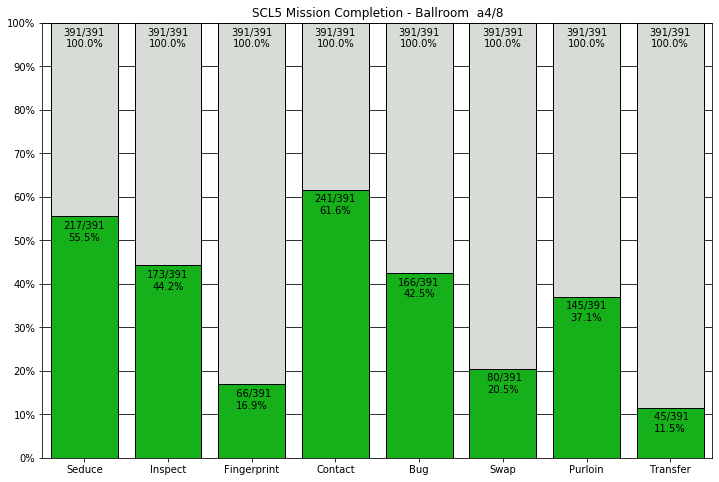

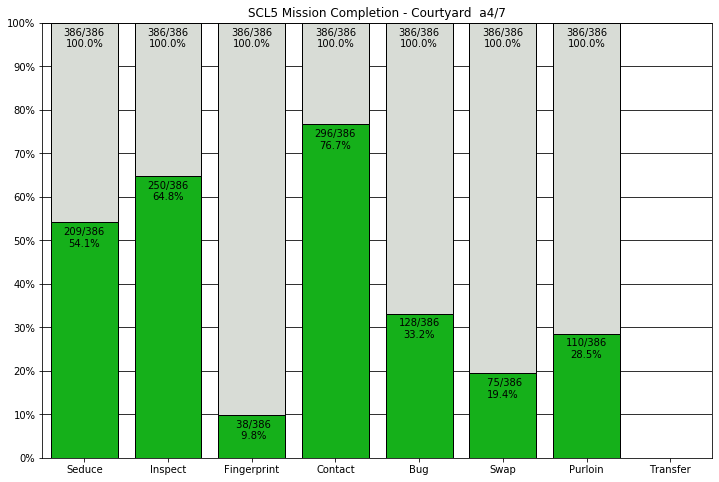

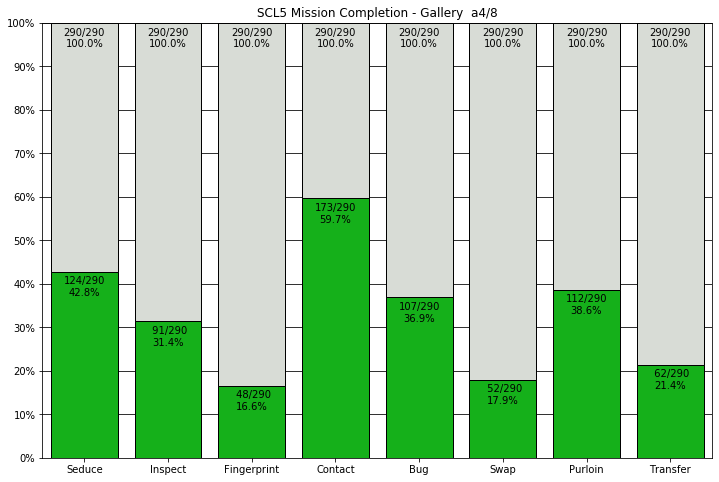

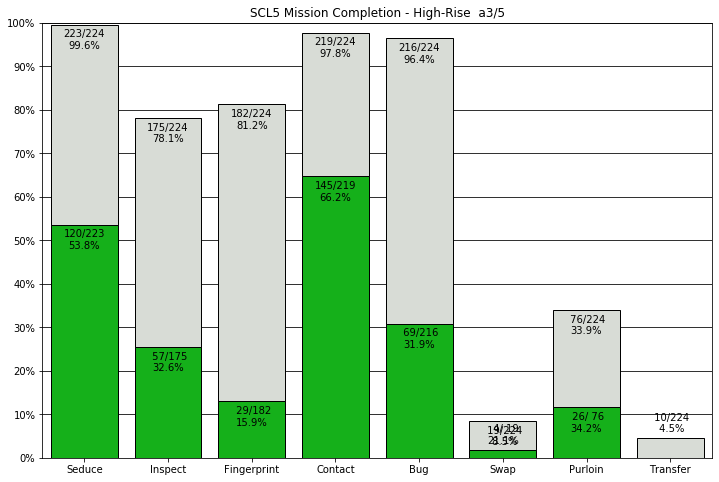

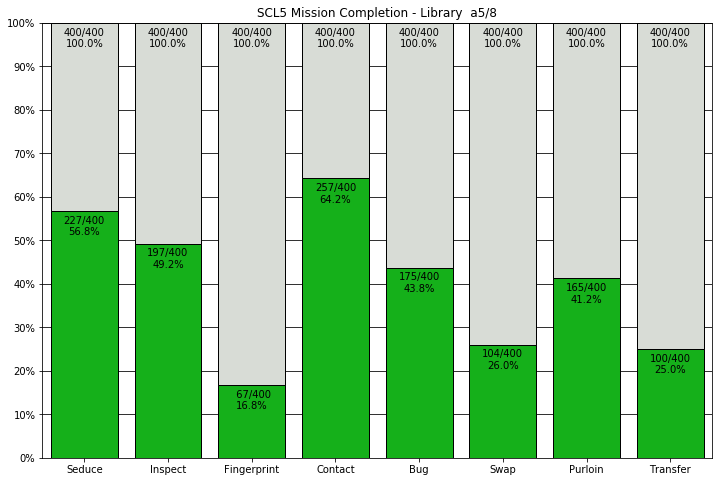

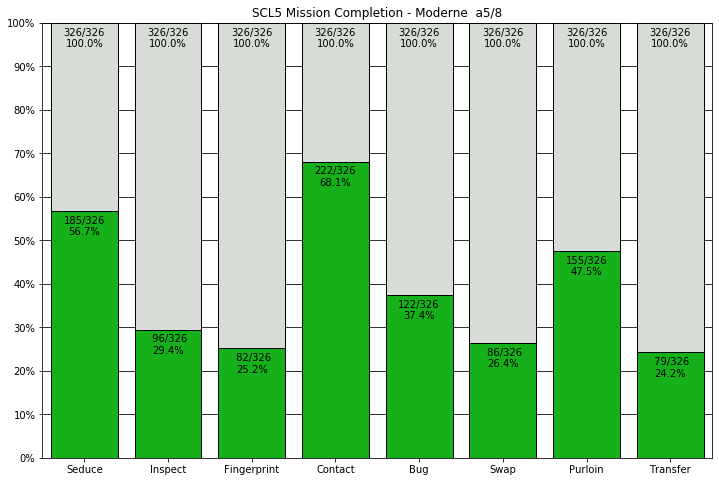

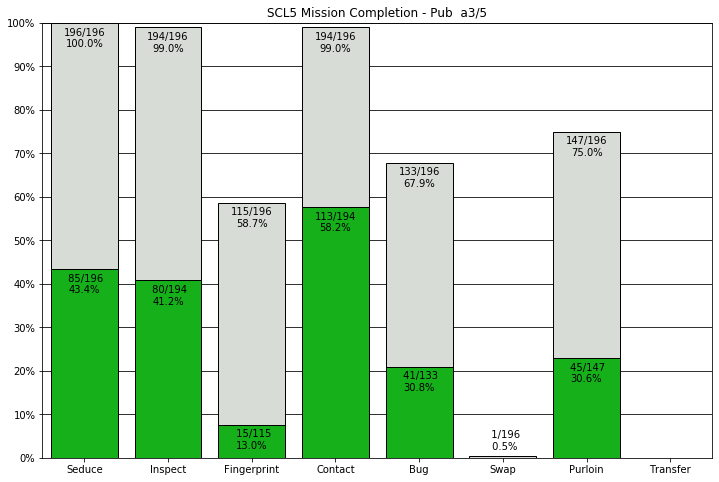

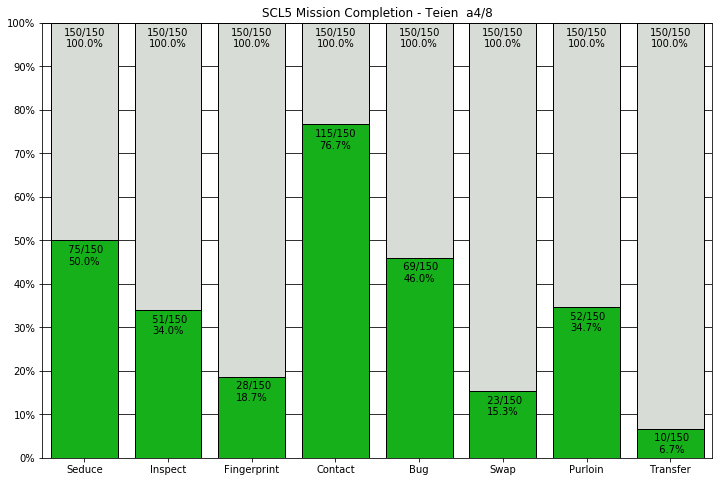

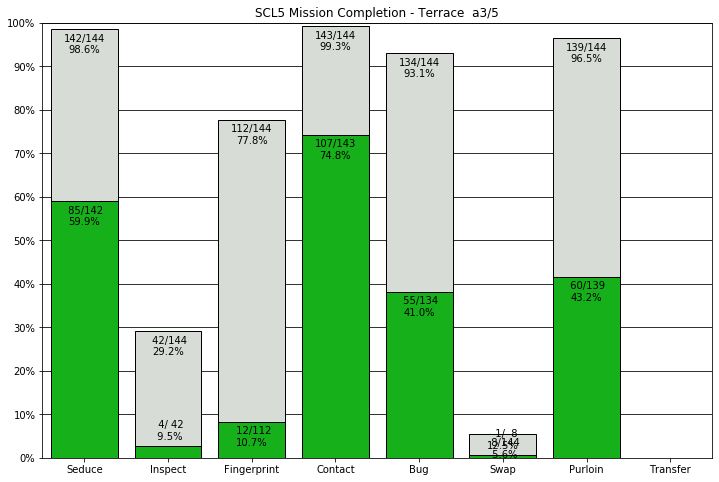

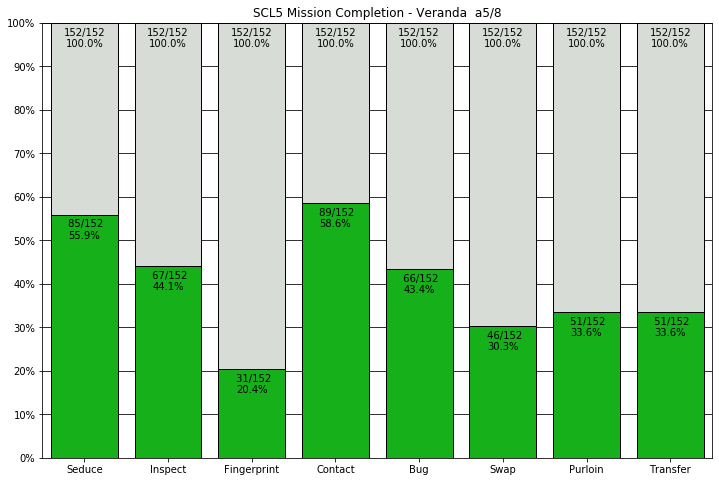

In [84]:
mission_completion(scl5_replays, "SCL5 Mission Completion", SCL5_VENUE_MODES)

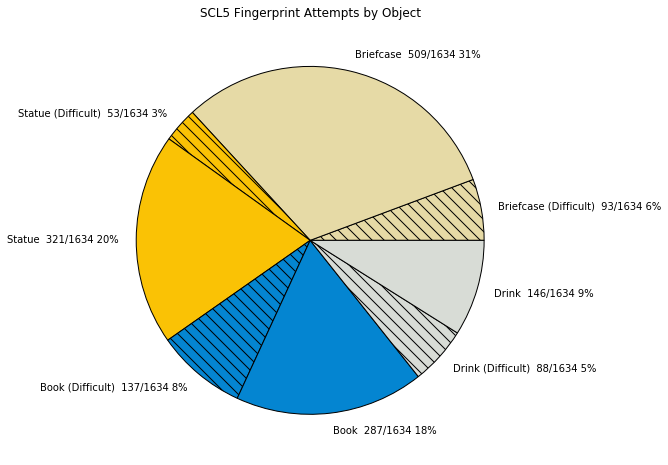

In [85]:
attempted_fingerprint_sources(scl5_replays, "SCL5 Fingerprint Attempts by Object")

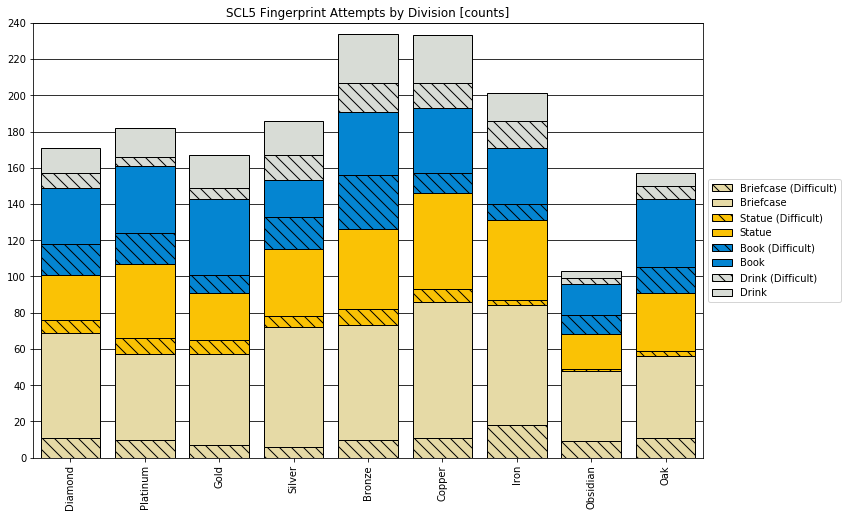

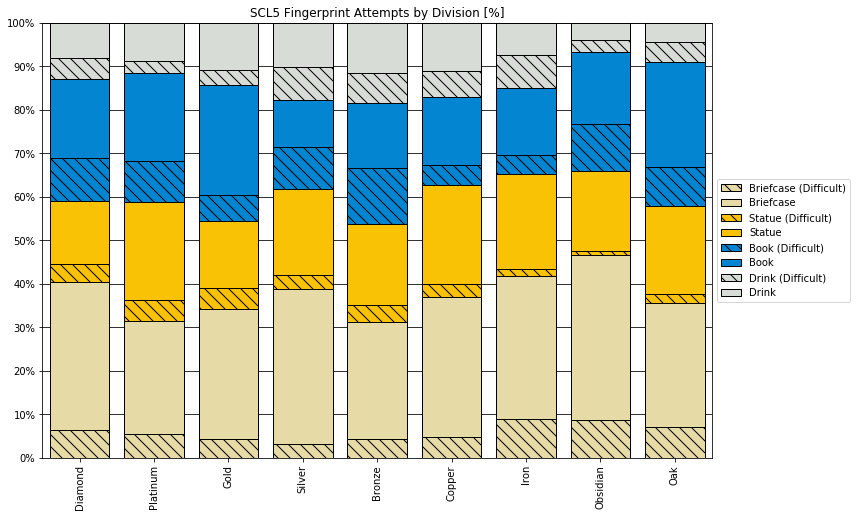

In [86]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Division",
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)

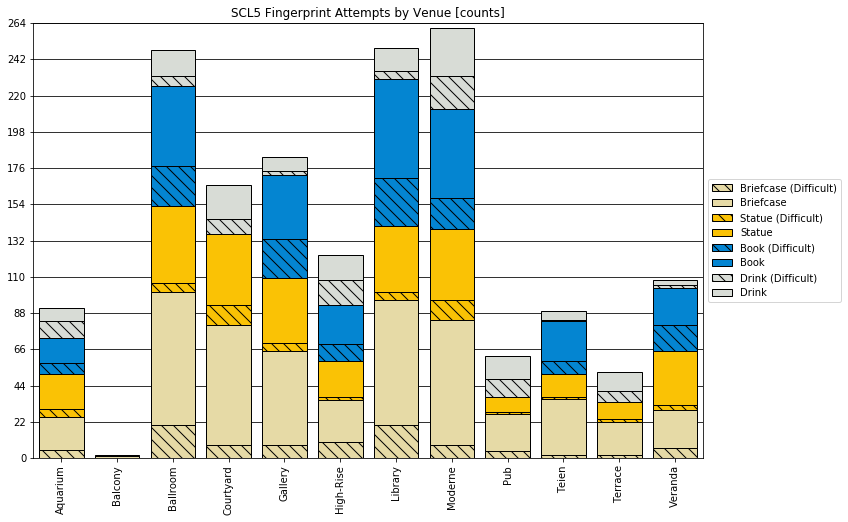

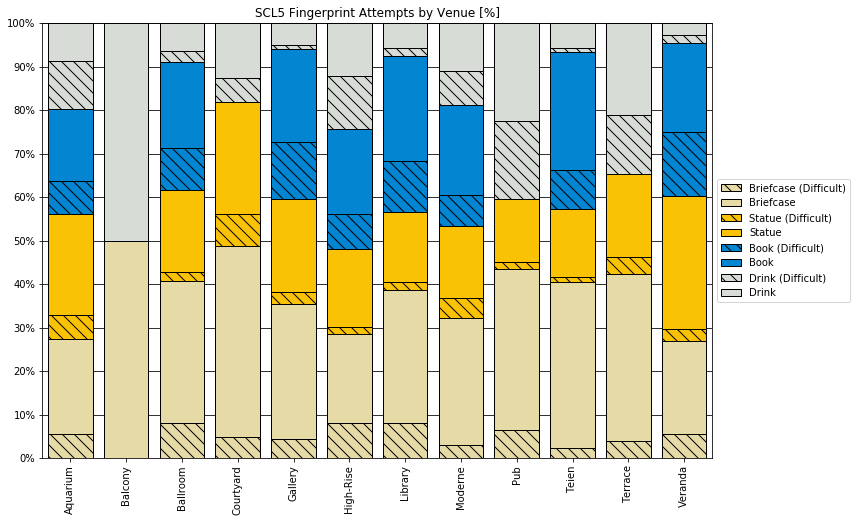

In [87]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Venue",
    groupby=lambda g: g.venue,
)

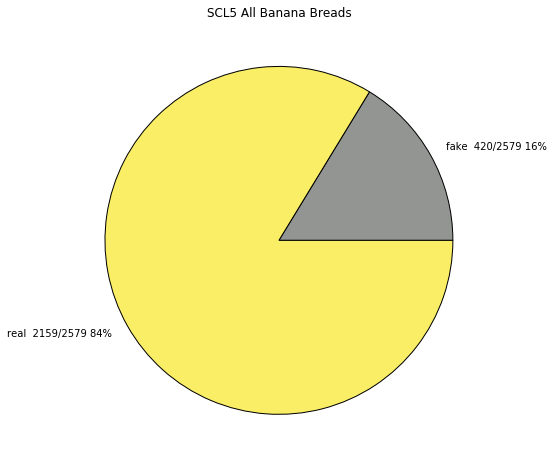

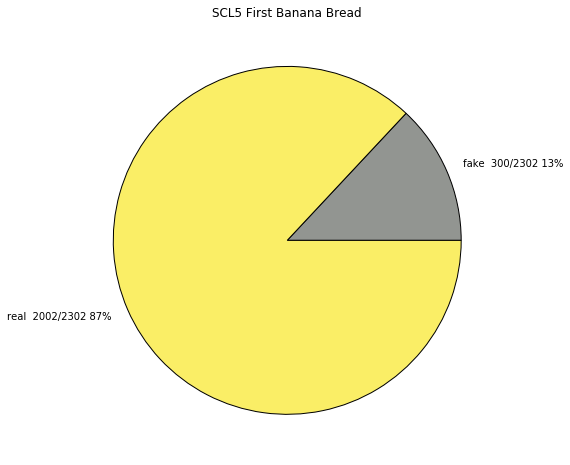

In [88]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads")
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread")

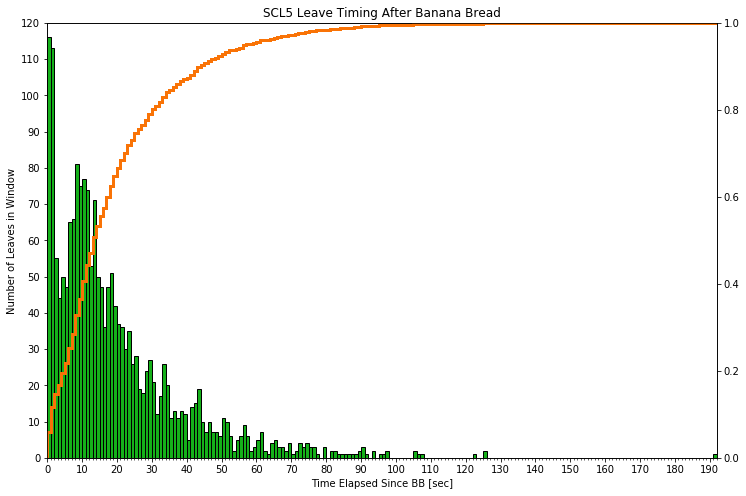

In [89]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

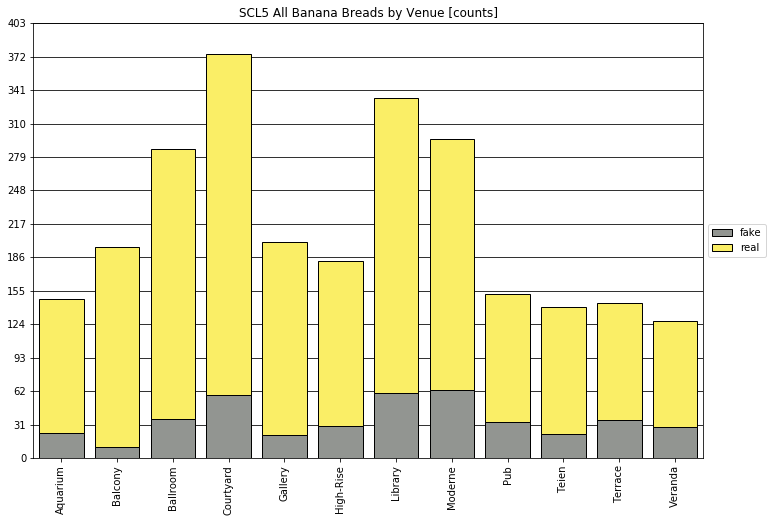

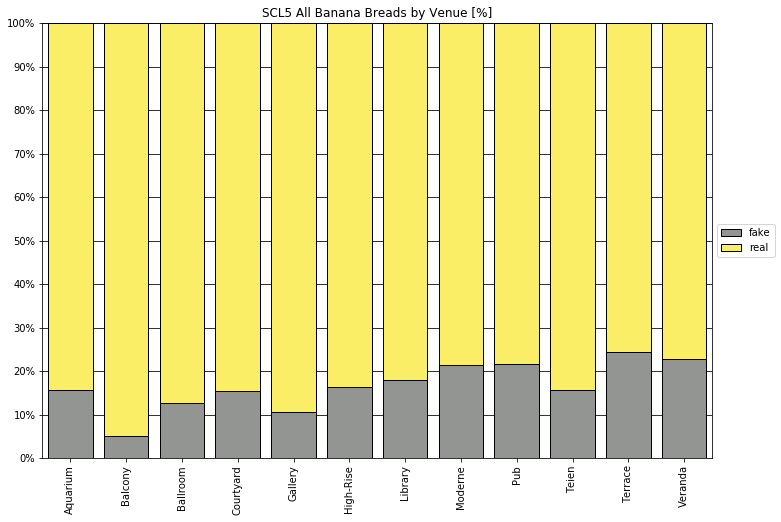

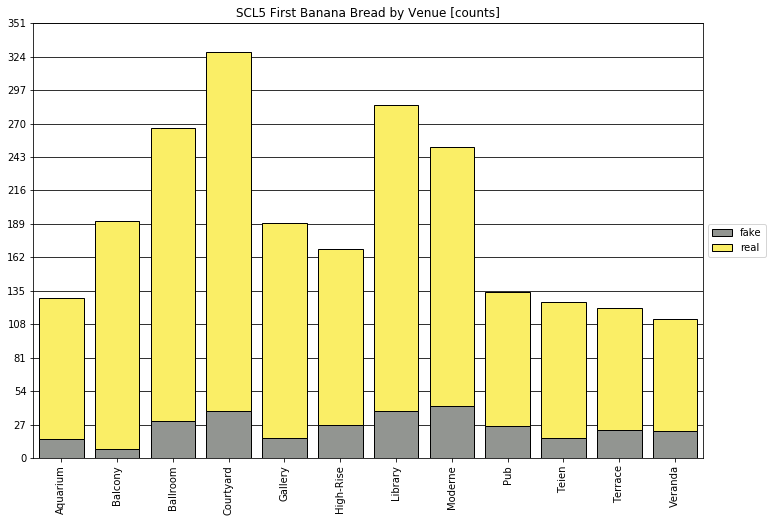

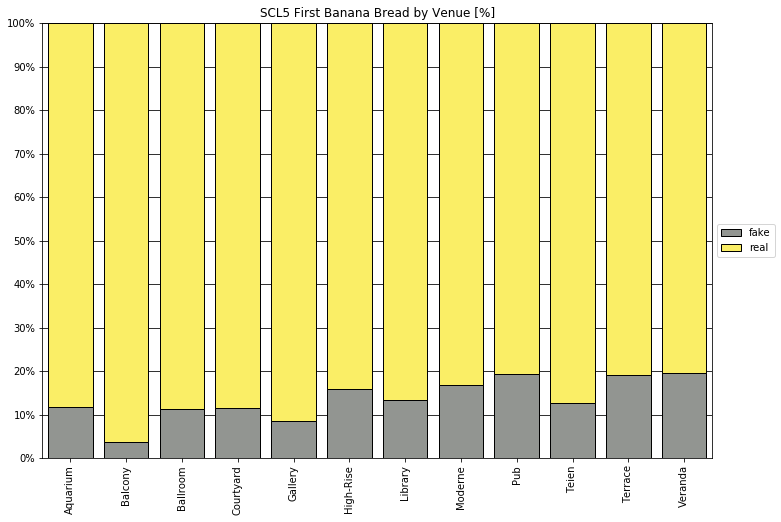

In [90]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads by Venue", groupby=lambda g: g.venue)
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread by Venue", groupby=lambda g: g.venue)

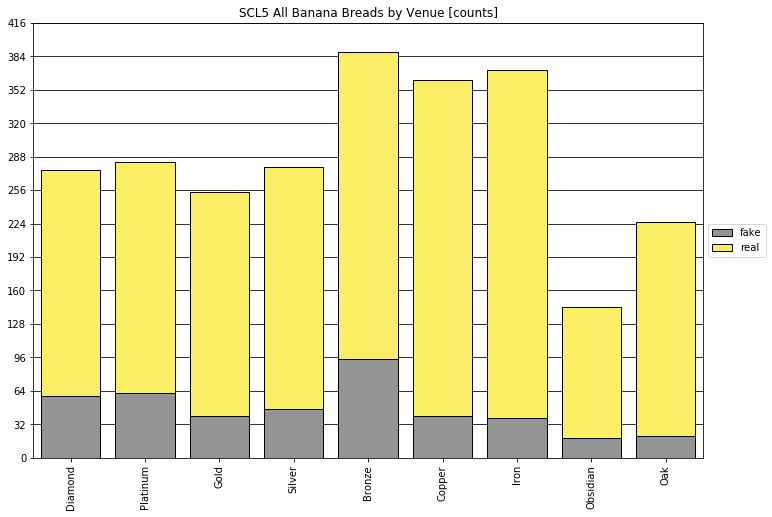

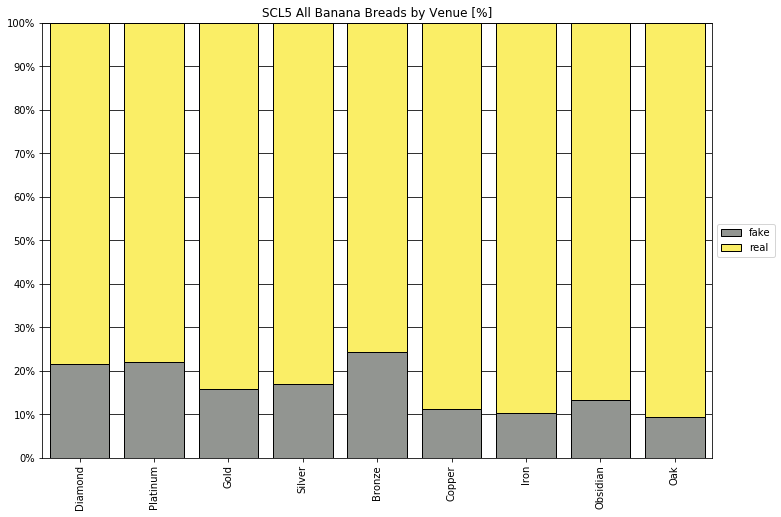

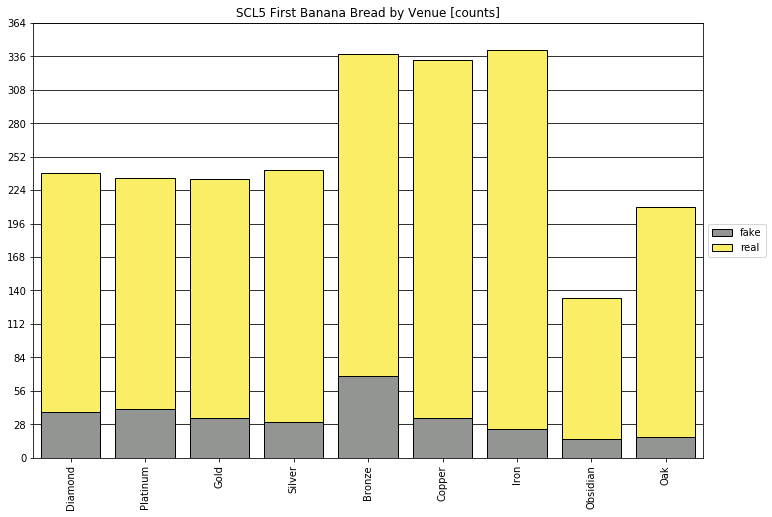

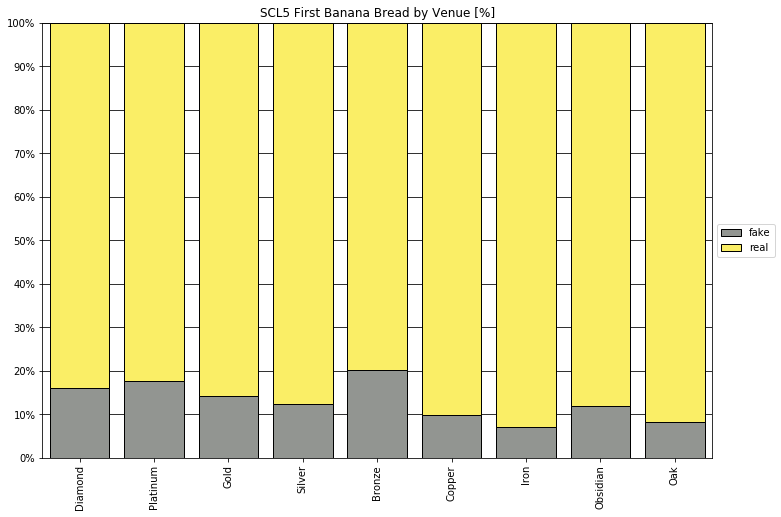

In [91]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 All Banana Breads by Venue",
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)
first_banana_bread_percentages(
    scl5_replays,
    "SCL5 First Banana Bread by Venue",
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)

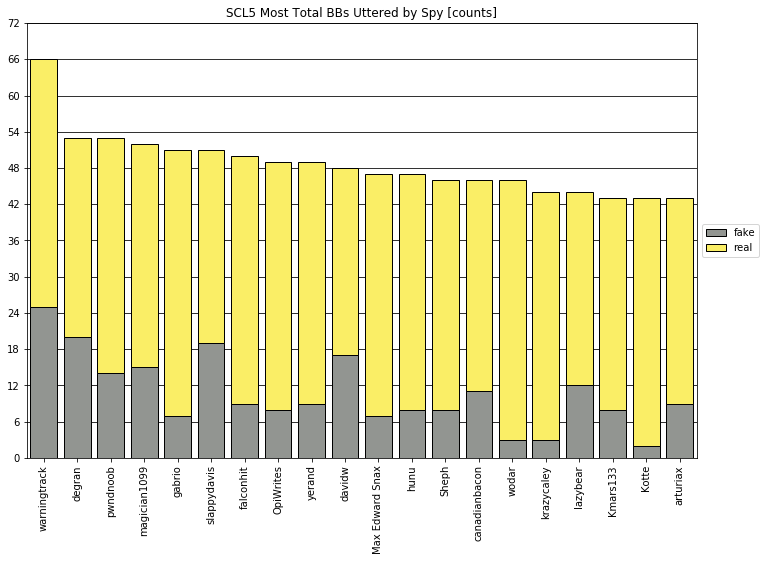

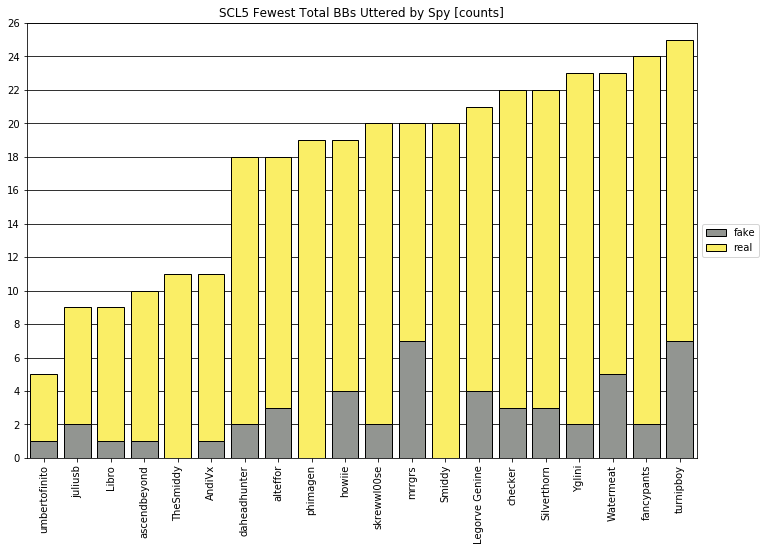

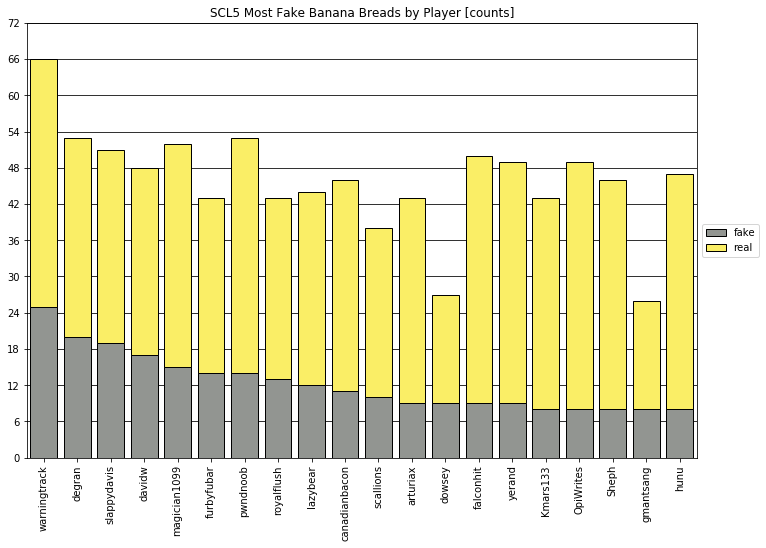

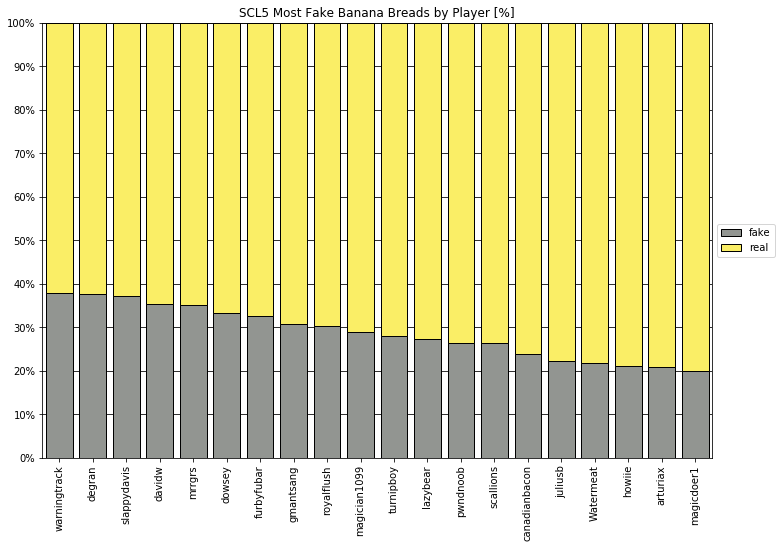

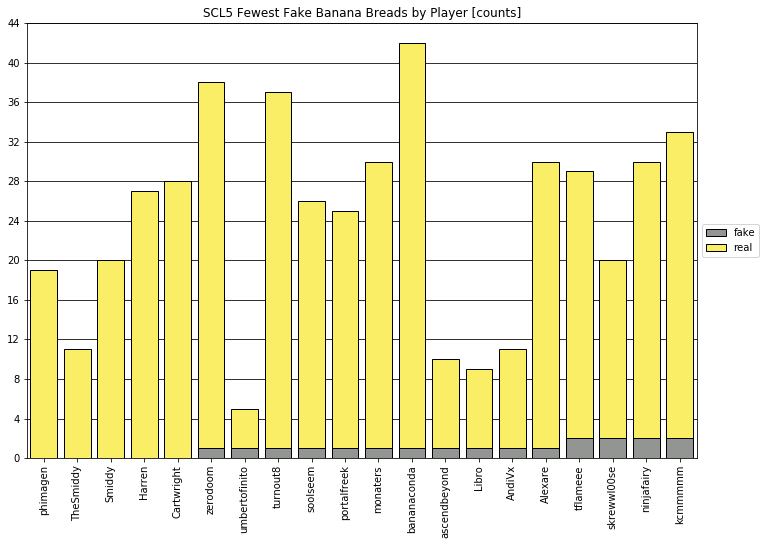

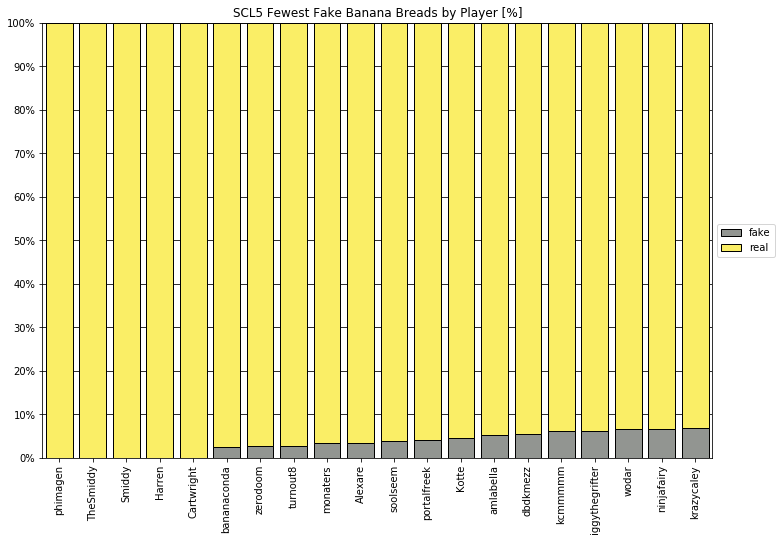

In [92]:
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Most Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    sort_data_item=sum,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Fewest Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    sort_data_item=sum,
    reversed_data_sort=True,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Most Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    sort_data_item="fake",
    limit=20
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Fewest Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    sort_data_item="fake",
    reversed_data_sort=True,
    limit=20
)

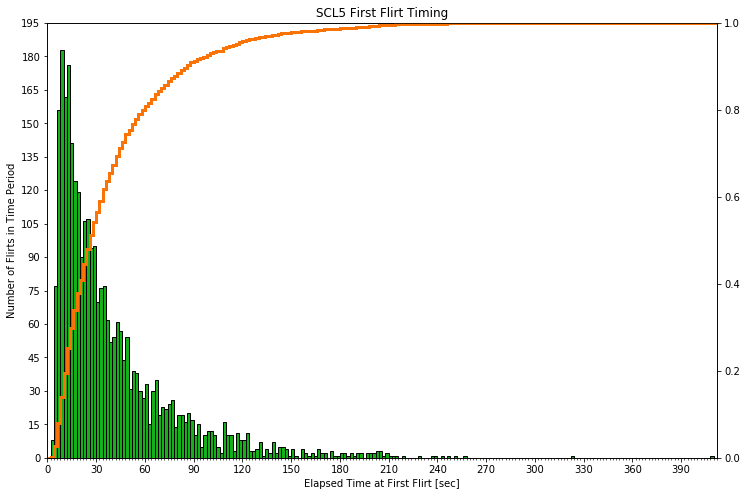

In [93]:
first_flirt_timing(scl5_replays, "SCL5 First Flirt Timing")

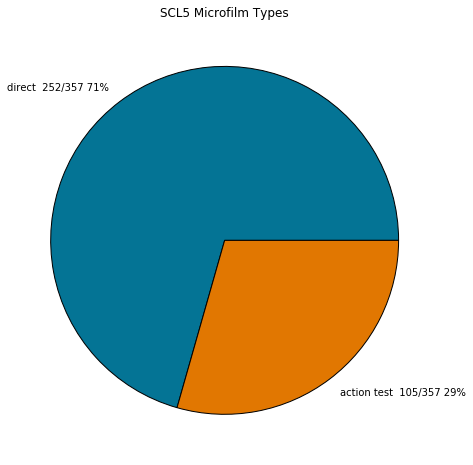

In [94]:
at_or_direct_mf(scl5_replays, "SCL5 Microfilm Types")

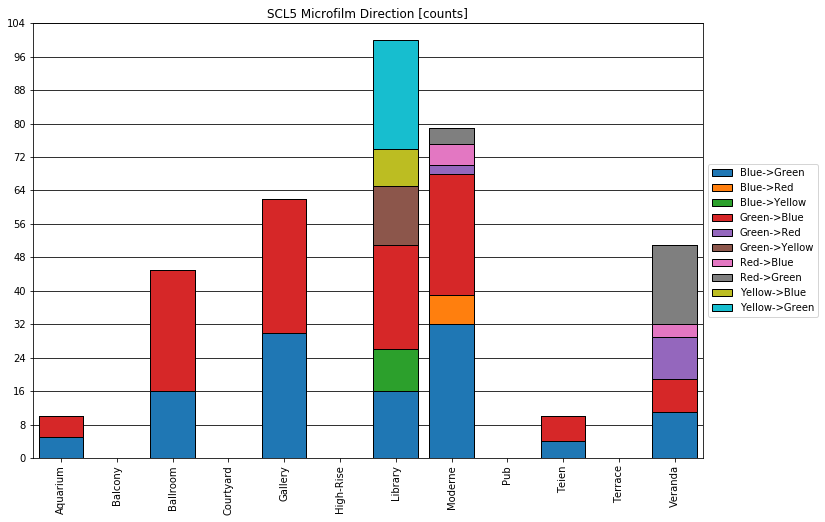

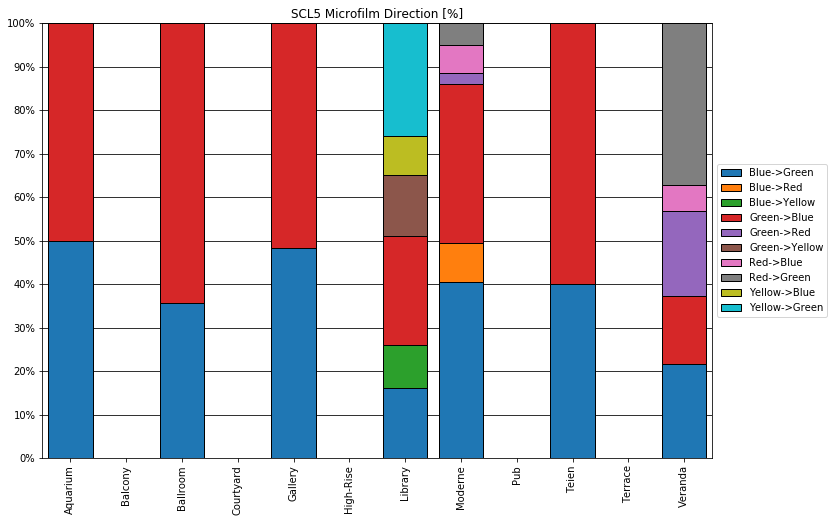

In [95]:
microfilm_direction(
    scl5_replays,
    "SCL5 Microfilm Direction",
    groupby=lambda g: g.venue,
)

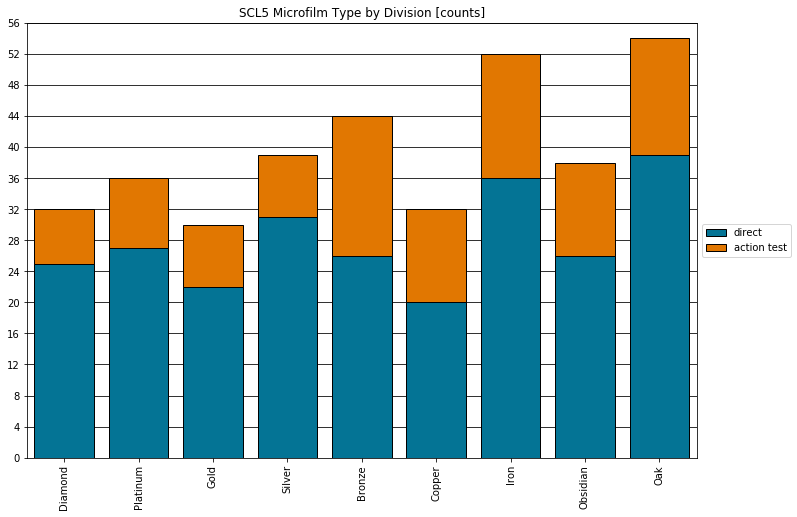

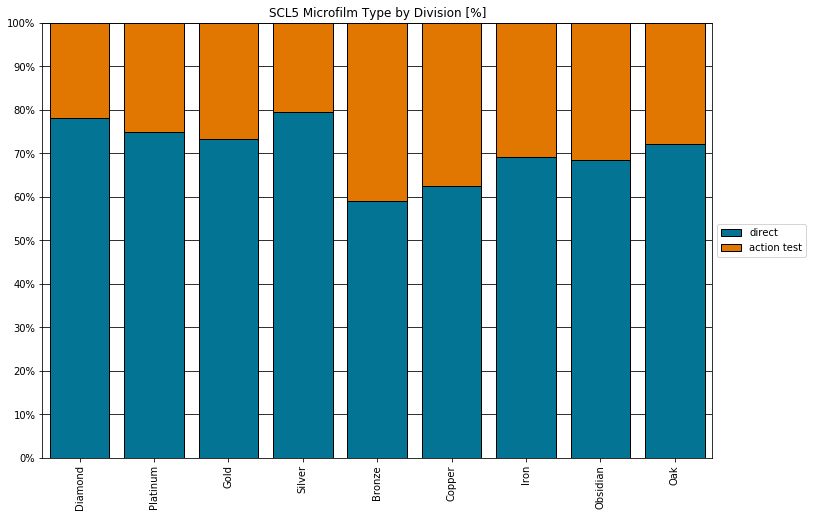

In [96]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Division',
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g),
)

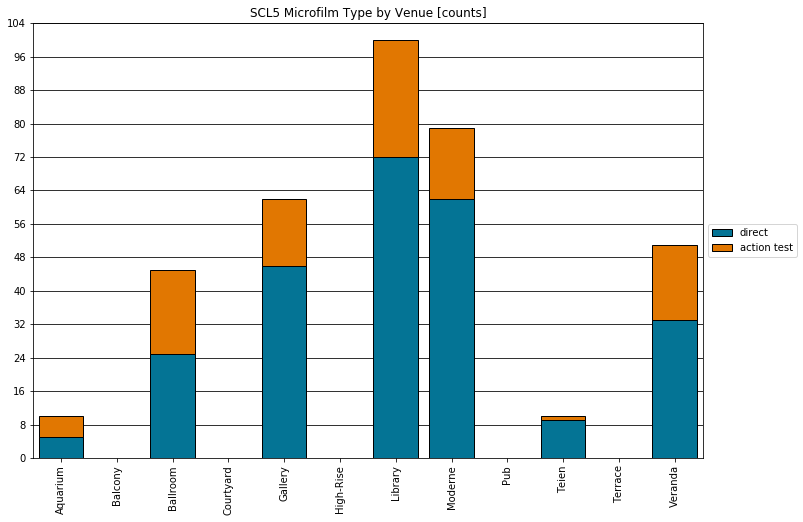

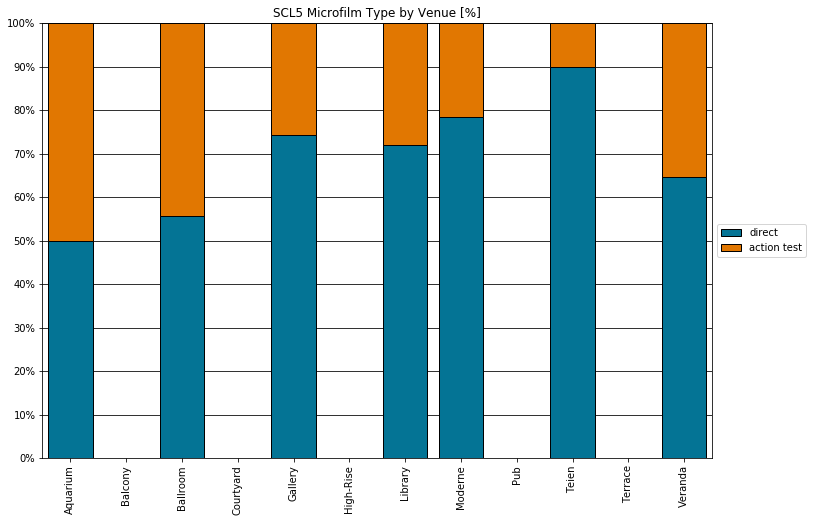

In [97]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Venue',
    groupby=lambda g: g.venue,
)

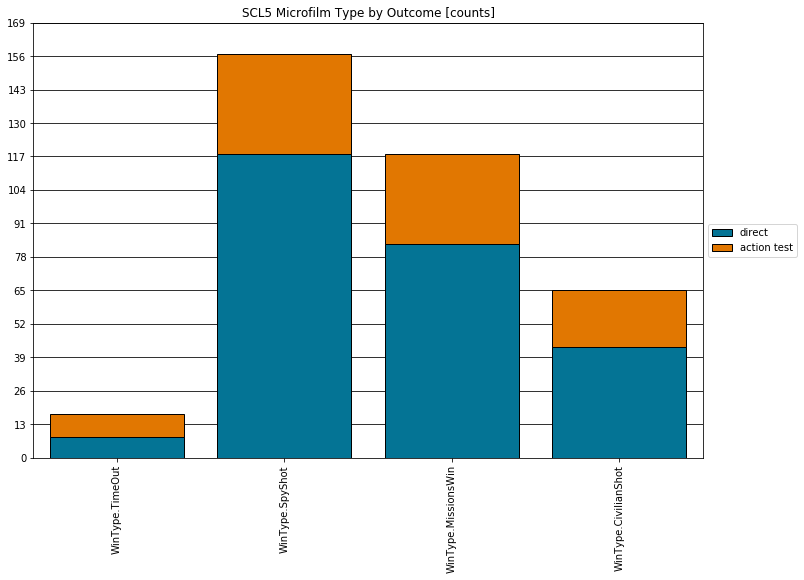

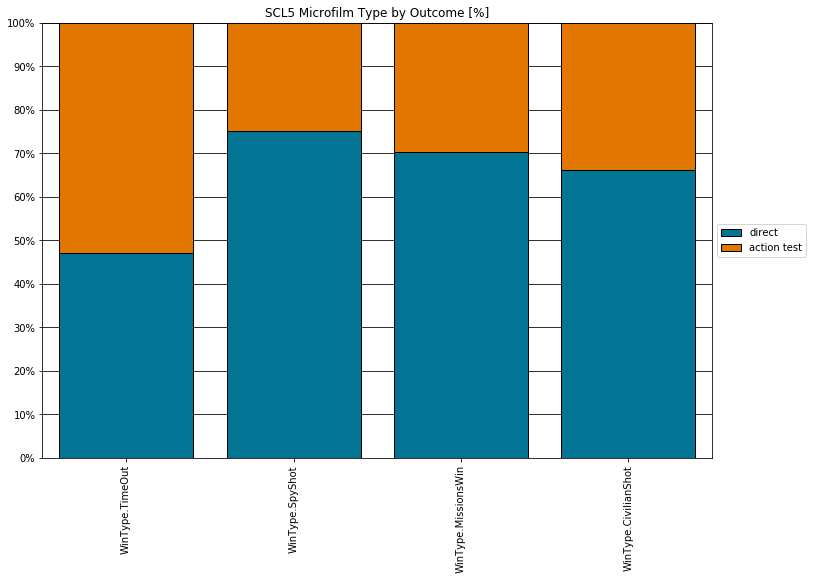

In [98]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Outcome',
    groupby=lambda g: g.win_type,
)

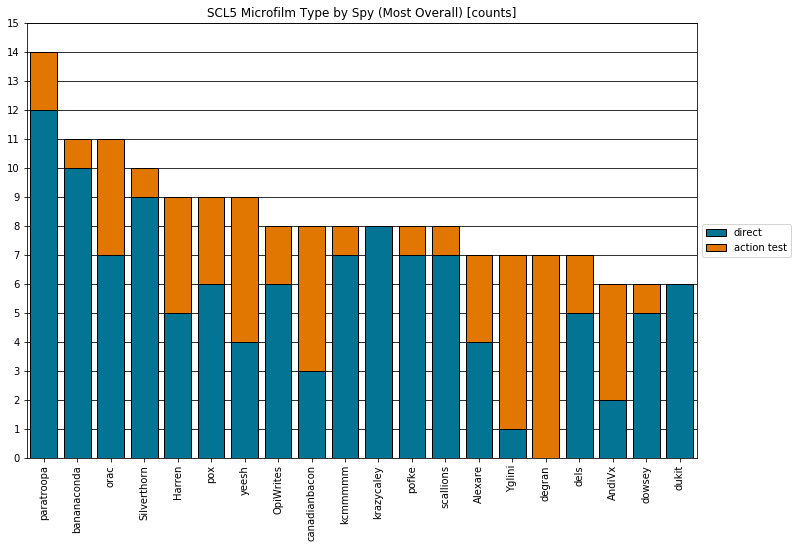

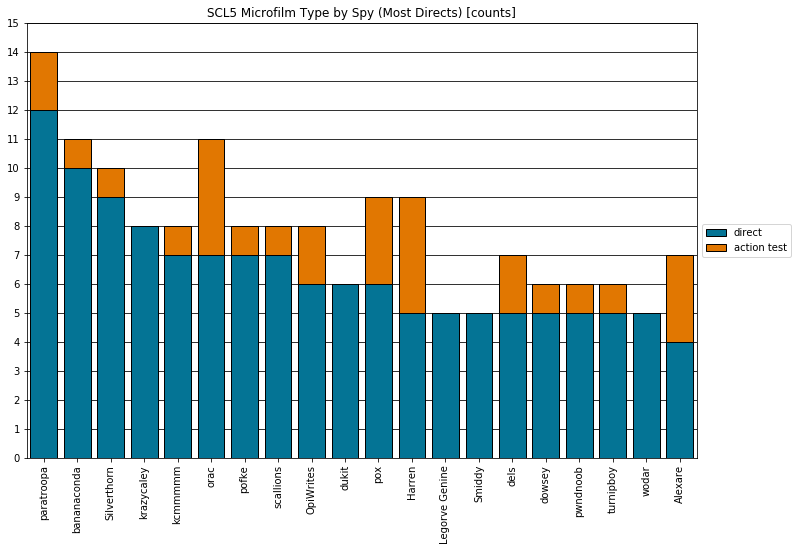

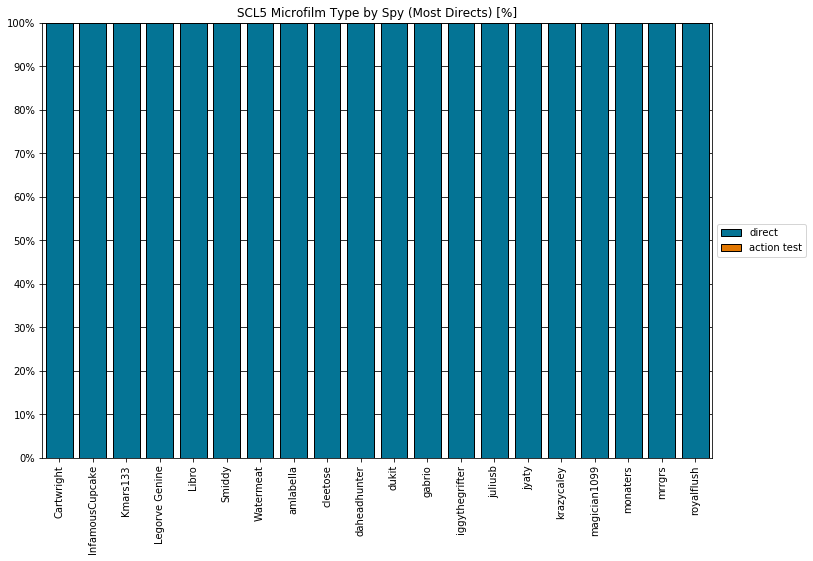

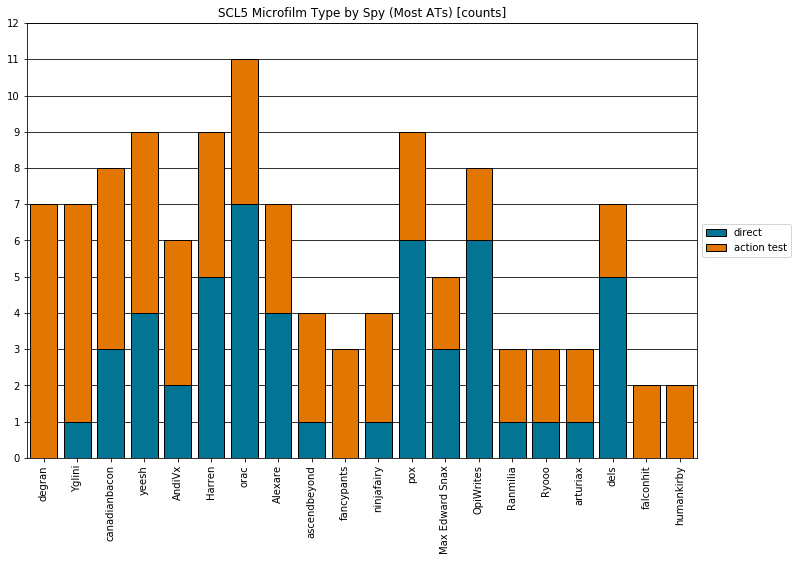

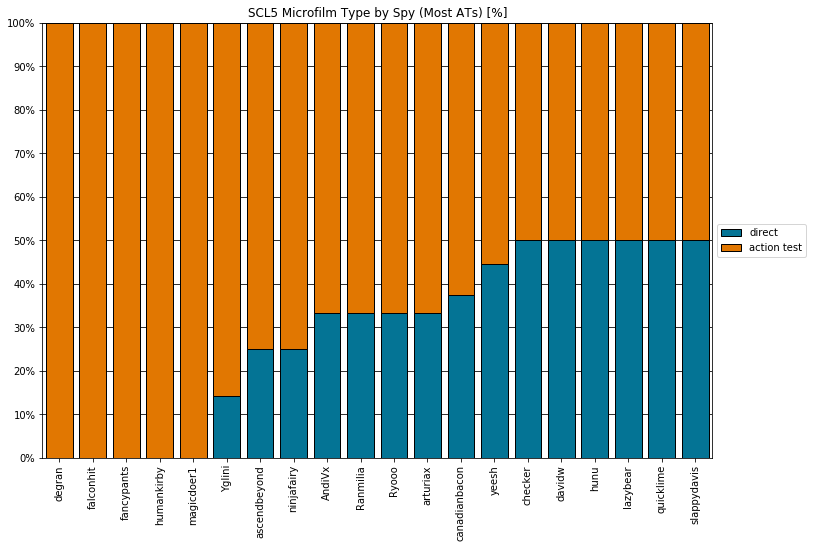

In [99]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Overall)',
    groupby=lambda g: g.spy,
    sort_data_item=sum,
    percentile_plot=False,
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Directs)',
    groupby=lambda g: g.spy,
    sort_data_item='direct',
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most ATs)',
    groupby=lambda g: g.spy,
    sort_data_item='action test',
    limit=20
)

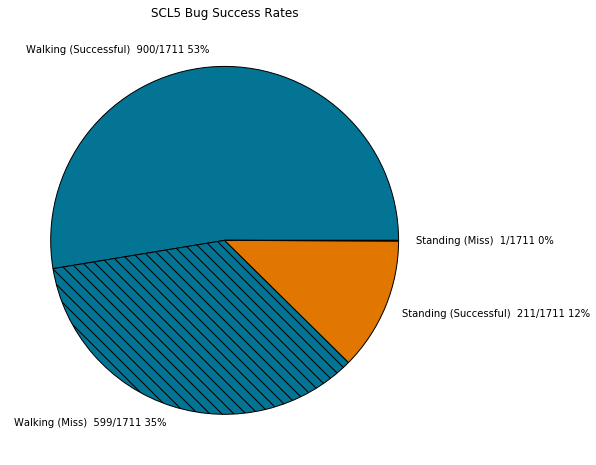

In [100]:
bug_success_rate(scl5_replays, "SCL5 Bug Success Rates")

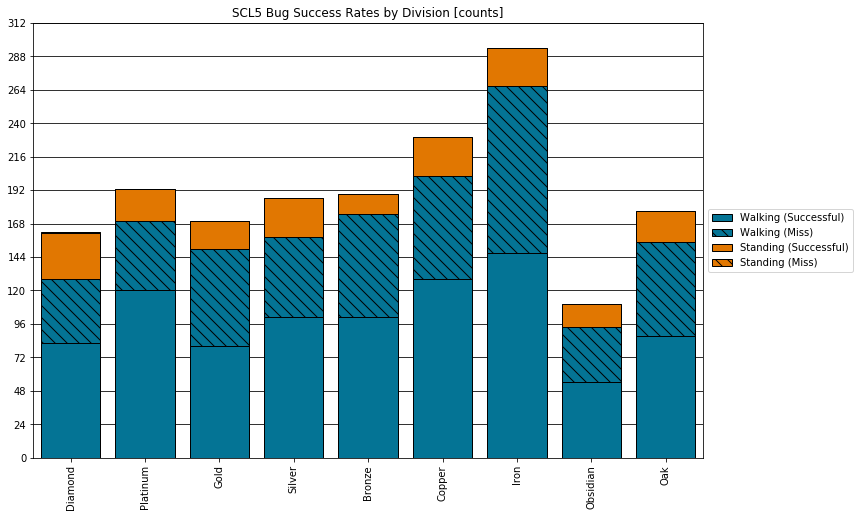

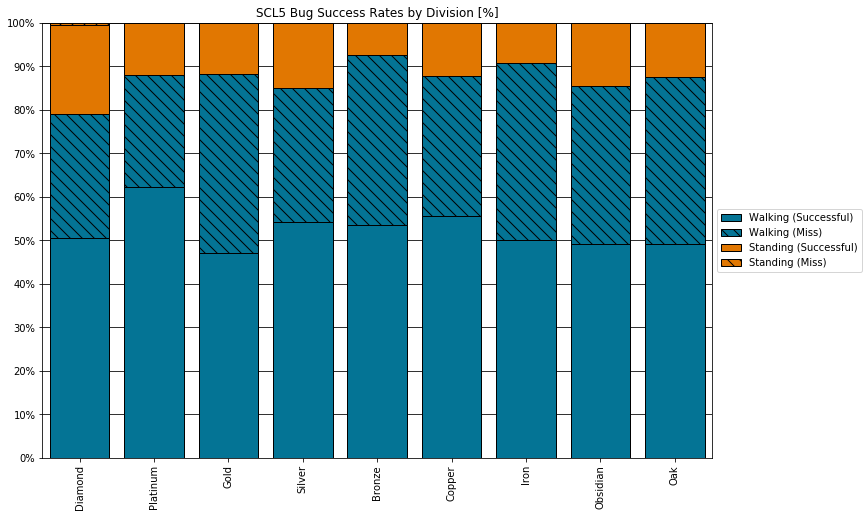

In [101]:
bug_success_rate(
    scl5_replays,
    'SCL5 Bug Success Rates by Division',
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)

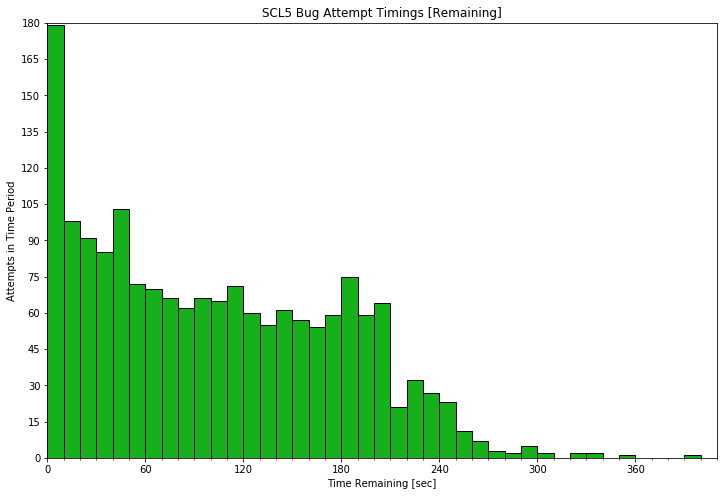

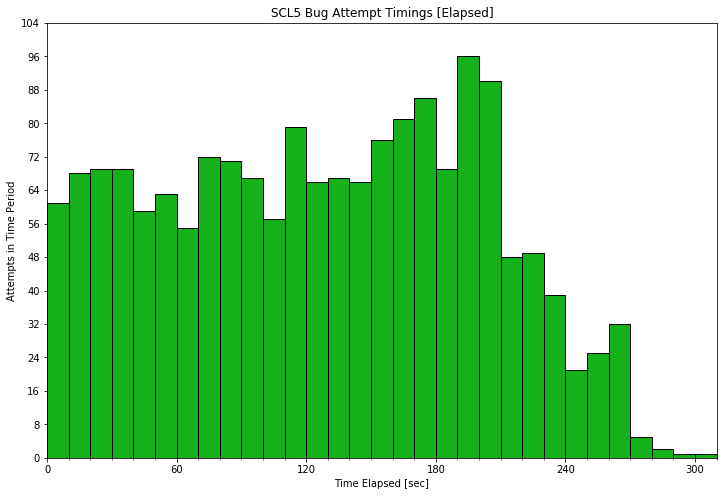

In [102]:
bug_attempt_timings(scl5_replays, "SCL5 Bug Attempt Timings")

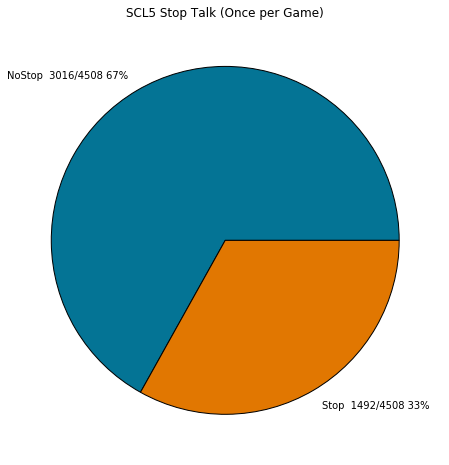

In [103]:
stop_talk_in_game_percentage(scl5_replays, "SCL5 Stop Talk (Once per Game)")

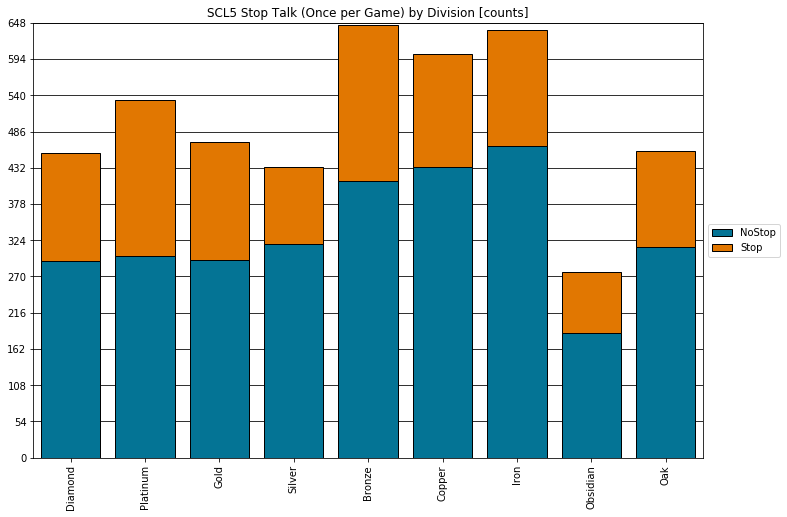

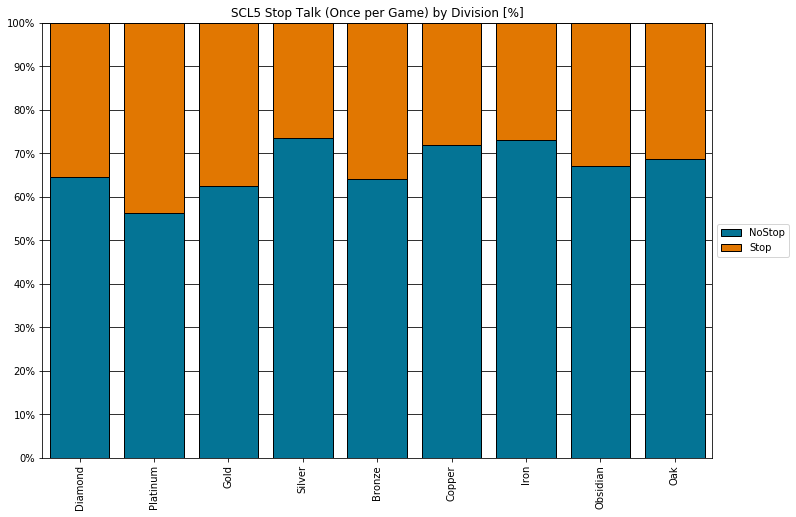

In [104]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Stop Talk (Once per Game) by Division',
    groupby=lambda g: g.division,
    order=lambda g: DIVISIONS.index(g)
)

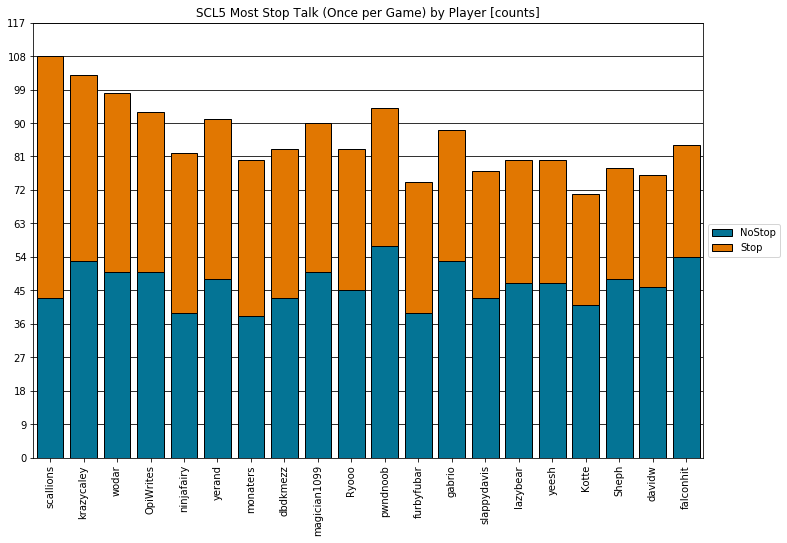

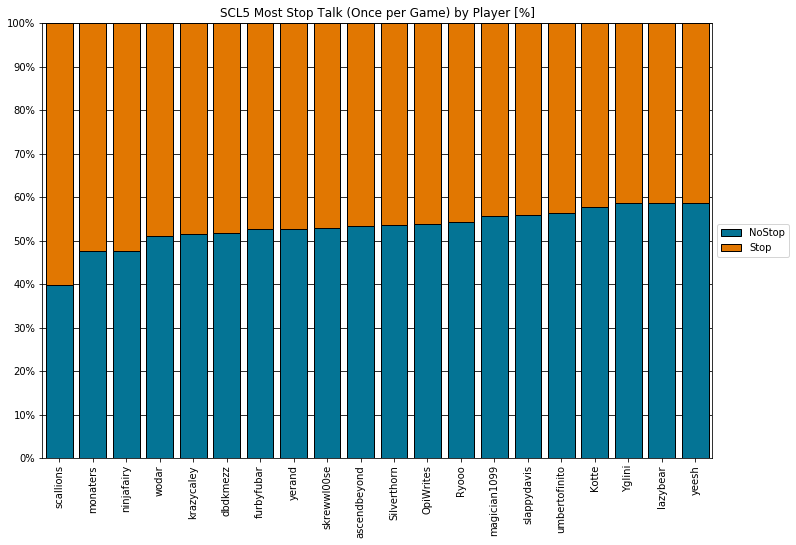

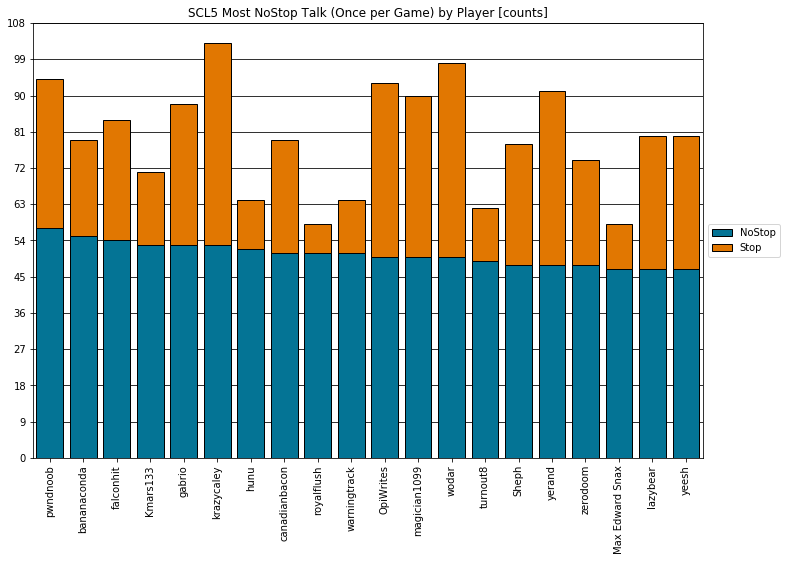

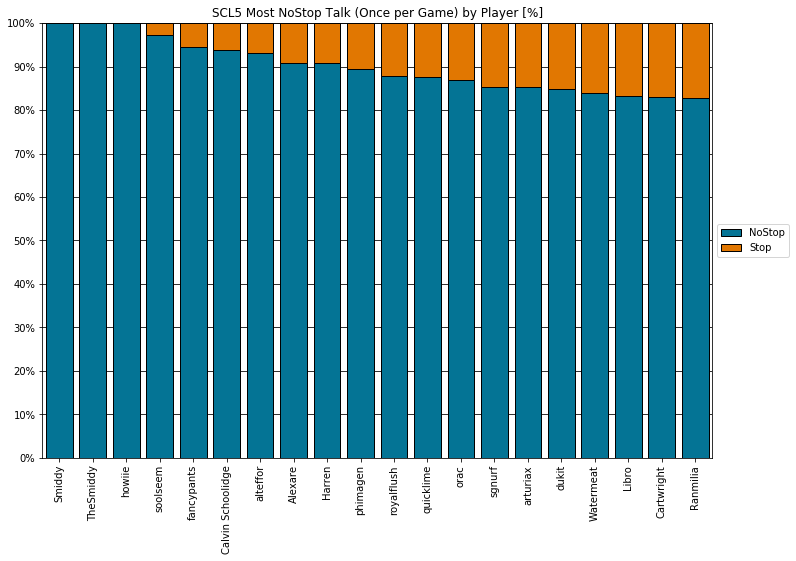

In [105]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most Stop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    sort_data_item='Stop',
    limit=20
)
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most NoStop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    sort_data_item='NoStop',
    limit=20
)

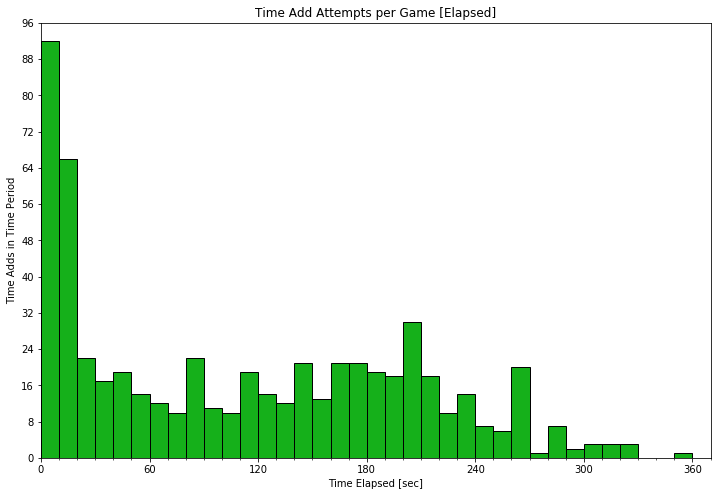

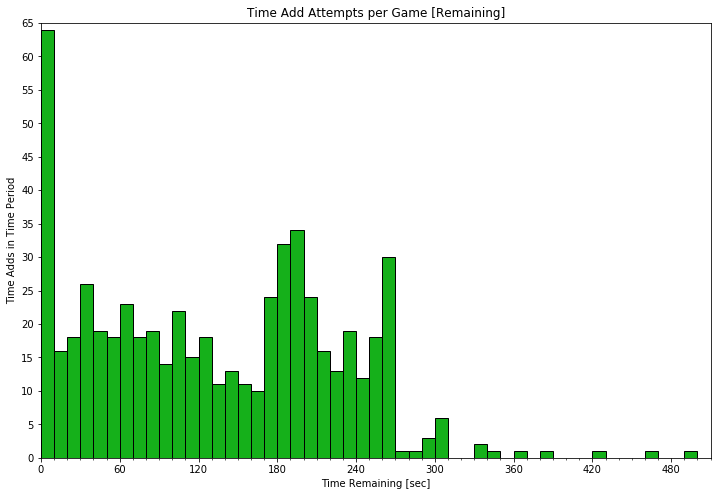

In [106]:
time_add_times(scl5_replays, "Time Add Attempts per Game")